<center>
    <img src="Logo-Olist.png" alt="logo">
</center>

# P5 Segmentez des clients d'un site e-commerce

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

### Sommaire

* [Fichier 'olist_customers_dataset.csv'](#chapter1)
* [Fichier 'olist_geolocation_dataset.csv'](#chapter2)
* [Fichier 'olist_order_items_dataset.csv'](#chapter3)
* [Fichier 'olist_order_payments_dataset.csv'](#chapter4)
* [Fichier 'olist_order_reviews_dataset.csv'](#chapter5)
* [Fichier 'olist_orders_dataset.csv'](#chapter6)
* [Fichier 'olist_products_dataset.csv'](#chapter7)
* [Fichier 'olist_sellers_dataset.csv'](#chapter8)
* [Fichier 'product_category_name_translation.csv'](#chapter9)
* [Jointure des fichiers](#chapter10)
* [Preprocessing](#chapter11)
* [Analyse exploratoire](#chapter12)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
pd.set_option('display.max_columns', 50)

# Fichier 'olist_customers_dataset.csv'<a class="anchor" id="chapter1"></a>

In [3]:
# Ouverture du fichier
customer = pd.read_csv('olist_customers_dataset.csv')

In [4]:
customer.shape

(99441, 5)

In [5]:
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
def exploration_csv(df):
    # Fonction composée d'une boucle qui va parcourir l'ensemble du fichier.
    # Pour chaque colonne, elle va afficher son nom, le nombre de valeurs uniques,
    # les valeurs uniques, le nombre de valeurs manquantes et le nombre de doublons
    for col in df:
        print(col)
        print(df[col].nunique())
        print(df[col].unique())
        print('Valeurs manquantes :', df[col].isna().sum())
        print('Nombre de doublons :', int(len(df[df.duplicated()])))
        print()
        print('*'*25)

In [8]:
def exploration_number(df):
    # Fonction composée d'une boucle qui va parcourir l'ensemble du fichier.
    # Pour chaque colonne, elle va afficher son nom, le nombre de valeurs uniques,
    # la valeur maximale, la valeur minimale et va afficher un boxplot et un histogramme.
    for col in df.select_dtypes('float'):
        print(col)
        print(df[col].nunique())
        print(df[col].unique())
        print(df[col].min())
        print(df[col].max())
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (14, 6)})
        f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
        plt.gca().set(xlabel=col, ylabel='Count')
        sns.boxplot(x=df[col], ax=ax_box, data=df, linewidth=1.0)
        sns.histplot(x=df[col], ax=ax_hist, bins=30, kde=True)

In [9]:
exploration_csv(customer)

customer_id
99441
['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' ... '5e28dfe12db7fb50a4b2f691faecea5e'
 '56b18e2166679b8a959d72dd06da27f9' '274fa6071e5e17fe303b9748641082c8']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
customer_unique_id
96096
['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e' ... 'e9f50caf99f032f0bf3c55141f019d99'
 '73c2643a0a458b49f58cea58833b192e' '84732c5050c01db9b23e19ba39899398']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
customer_zip_code_prefix
14994
[14409  9790  1151 ...  5538 74980 99043]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
customer_city
4119
['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
customer_state
27
['SP' 'SC' 'MG' 'PR

Le fichier comprend 5 colonnes pour 99441 lignes.  

Les colonnes correspondent:  
* "customer_id" : l'identifiant attribué au client pour la commande
* 'customer_unique_id": identifiant unique du client
* 'customer_zip_code_prefixe' : correspond au préfix du code postal du client qui a passé commande
* 'customer_city' : ville de résidence du client
* 'customer_state' : état de résidence du client

*"Dans notre système, chaque commande est attribuée à un identifiant client unique . Cela signifie qu'un même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un client unique_id sur l'ensemble de données est de vous permettre d'identifier les clients qui ont effectué des rachats dans le magasin. Sinon, vous constaterez que chaque commande est associée à un client différent."*  

Un client peut avoir plusieurs identifiants s'il a passé plusieurs commandes.

In [10]:
customer.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Ce fichier va me permettre de déterminer : 
* le nombre de commandes effectuées par client
* les villes qui regroupent le plus de commandes
* les états qui regroupent le plus de commandes

# Graphiques

In [11]:
# Je regroupe le nombre de commandes en fonction de l'identifiant unique de chaque client
commande = customer.groupby(['customer_unique_id'])[
    'customer_id'].size().value_counts().reset_index()
commande

,index,customer_id
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8
5,6,6
6,7,3
7,9,1
8,17,1


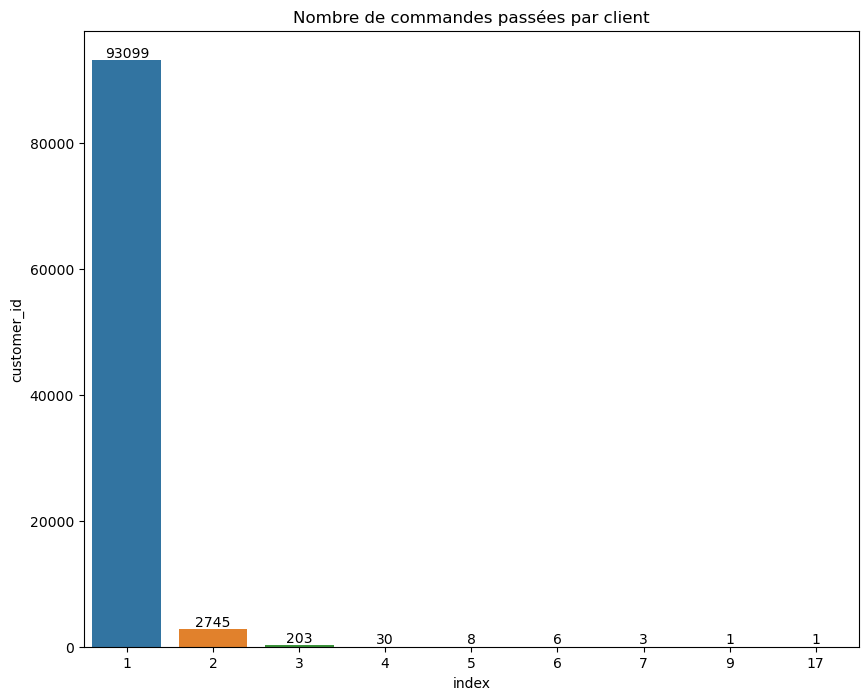

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=commande, x=commande['index'], y=commande['customer_id'])
ax.bar_label(ax.containers[0])
plt.title('Nombre de commandes passées par client')
plt.show()

La majorité des clients n'ont passé qu'une commande.  
On remarque aussi qu'un client a passé 17 commandes.

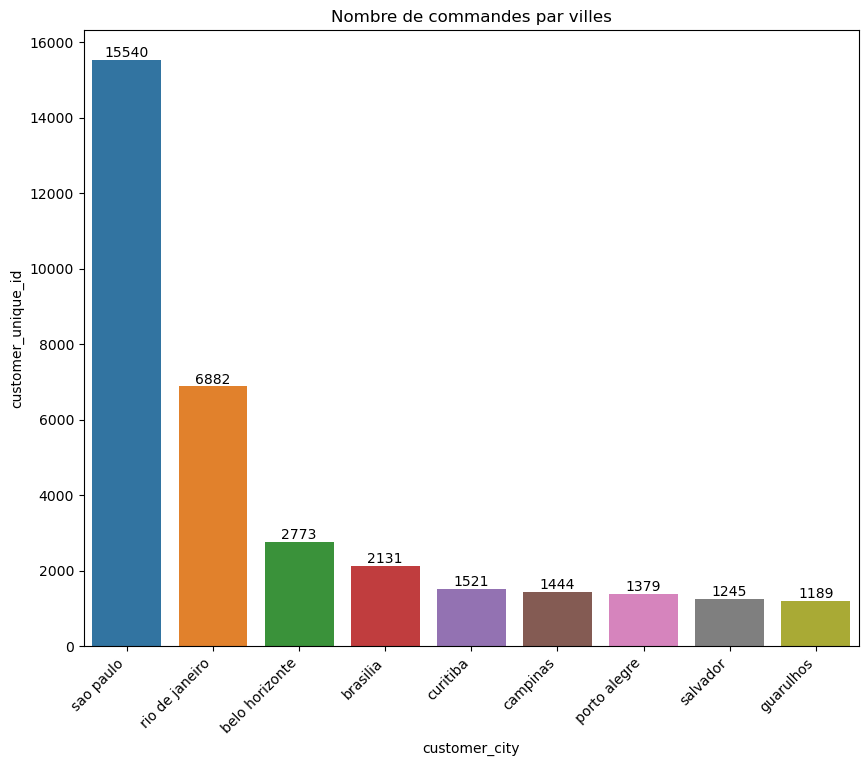

In [13]:
ville = customer.groupby(['customer_city'])[
    'customer_unique_id'].count().reset_index()
ville = ville.sort_values(by='customer_unique_id', ascending=False)
ville_top = ville.loc[ville['customer_unique_id'] > 1000, :]
ville_flop = ville.tail(9)

plt.figure(figsize=(10, 8))
ax1 = sns.barplot(
    data=ville_top, x=ville_top['customer_city'], y=ville_top['customer_unique_id'])
ax1.bar_label(ax1.containers[0])
plt.title('Nombre de commandes par villes')
plt.xticks(rotation=45, ha='right')
plt.show()

Sao Paulo et Rio de Janeiro sont les villes qui ont le plus grand nombre de commandes. 

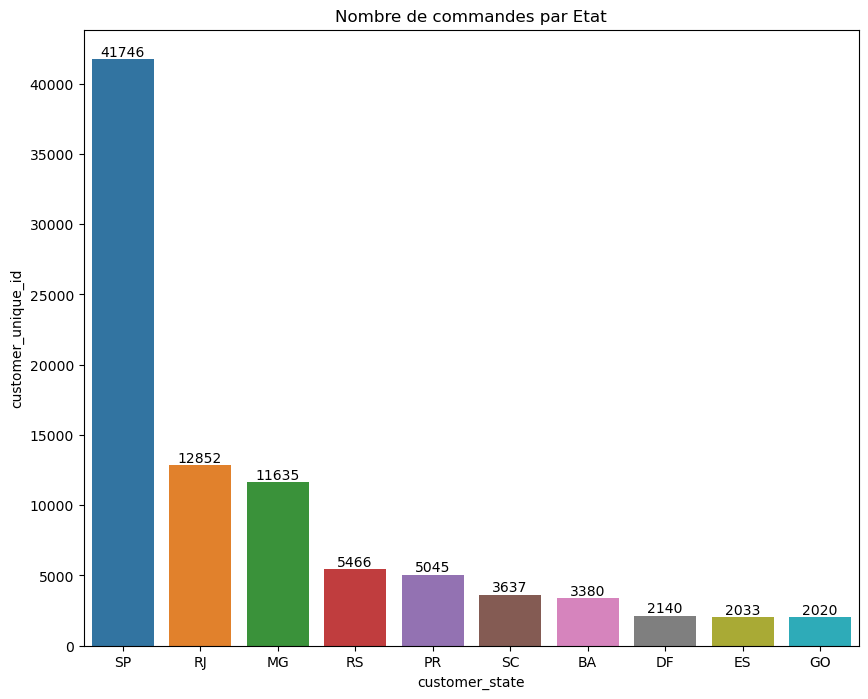

In [14]:
etat = customer.groupby(['customer_state'])[
    'customer_unique_id'].count().reset_index()
etat = etat.sort_values(by='customer_unique_id', ascending=False)
top_etat = etat.head(10)


plt.figure(figsize=(10, 8))
ax1 = sns.barplot(
    data=top_etat, x=top_etat['customer_state'], y=top_etat['customer_unique_id'])
ax1.bar_label(ax1.containers[0])
plt.title('Nombre de commandes par Etat')
plt.show()

Idem pour les états, Rio de Janeiro et Sau Polo arrivent en tête.

# Fichier 'olist_geolocation_dataset.csv'<a class="anchor" id="chapter2"></a>

In [15]:
geo = pd.read_csv('olist_geolocation_dataset.csv')

In [16]:
geo.shape

(1000163, 5)

In [17]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [19]:
exploration_csv(geo)

geolocation_zip_code_prefix
19015
[ 1037  1046  1041 ... 99910 99920 99952]
Valeurs manquantes : 0
Nombre de doublons : 261831

*************************
geolocation_lat
717360
[-23.54562128 -23.54608113 -23.54612897 ... -28.06886363 -28.06863888
 -28.38893188]
Valeurs manquantes : 0
Nombre de doublons : 261831

*************************
geolocation_lng
717613
[-46.63929205 -46.6448203  -46.64295148 ... -52.01296438 -52.01070525
 -51.84687132]
Valeurs manquantes : 0
Nombre de doublons : 261831

*************************
geolocation_city
8011
['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
Valeurs manquantes : 0
Nombre de doublons : 261831

*************************
geolocation_state
27
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']
Valeurs manquantes : 0
Nombre de doublons : 261831

*************************


Ce fichier contient 5 colonnes et 1000163 lignes.
Les colonnes correspondent à:  
* 'geolocation_zip_code_prefix' : correspond au préfix du code postal du client qui a passé commande
* 'geolocation_lat' : latitude
* 'geolocation_lng' : longitude
* 'geolocation_city' : ville de résidence du client
* 'geolocation_state' : état de résidence du client  

**Remarque : **
* Ce fichier contient 261831 doublons
* Plusieurs villes ne sont pas écrites de la même façon

In [20]:
geo = geo.drop_duplicates()

In [21]:
geo.shape

(738332, 5)

D'après ce lien :  
https://fr.wikipedia.org/wiki/Br%C3%A9sil#D%C3%A9coupage_administratif  

Le Brézil est découpé en 5 zones. 

In [22]:
geo['geolocation_city'].nunique()

8011

In [23]:
# Je supprime les accents afin d'obtenir le même terme pour chaque ville et éviter les doublons
geo['geolocation_city'] = geo['geolocation_city'].str.replace('é|è', 'e')
geo['geolocation_city'] = geo['geolocation_city'].str.replace('â|á|ã', 'a')
geo['geolocation_city'] = geo['geolocation_city'].str.replace('ó|ô', 'o')
geo['geolocation_city'] = geo['geolocation_city'].str.replace('í|ï', 'i')
geo['geolocation_city'] = geo['geolocation_city'].str.replace('  ', ' ')
geo['geolocation_city'] = geo['geolocation_city'].str.replace(
    '4o|4º', 'quarto')

C:\Users\sarah\AppData\Local\Temp\ipykernel_9996\3141090577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  geo['geolocation_city'] = geo['geolocation_city'].str.replace('é|è','e');
C:\Users\sarah\AppData\Local\Temp\ipykernel_9996\3141090577.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  geo['geolocation_city'] = geo['geolocation_city'].str.replace('â|á|ã','a');
C:\Users\sarah\AppData\Local\Temp\ipykernel_9996\3141090577.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  geo['geolocation_city'] = geo['geolocation_city'].str.replace('ó|ô','o');
C:\Users\sarah\AppData\Local\Temp\ipykernel_9996\3141090577.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  geo['geolocation_city'] = geo['geolocation_city'].str.replace('í|ï','i');
C:\Users\sarah\AppData\Local\Temp\ipykernel_9996\31410

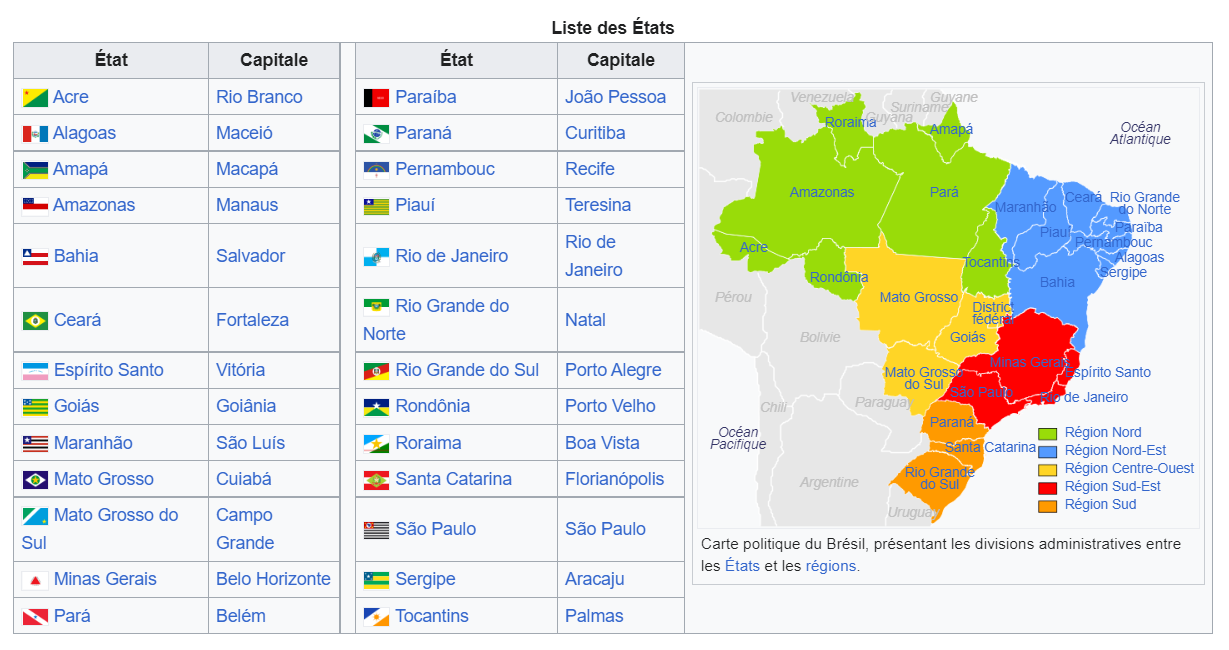

In [24]:
# Je crée un dictionnaire pour pouvoir créer une colonne Zone
dico_zone = {
    # Zone Nord:
    'AC': 'Nord',
    'AL': 'Nord',
    'AP': 'Nord',
    'RO': 'Nord',
    'AM': 'Nord',
    'PA': 'Nord',
    'RR': 'Nord',
    'TO': 'Nord',

    # Zone Nord_Est:
    'BA': 'Nord-Est',
    'CE': 'Nord-Est',
    'MA': 'Nord-Est',
    'PB': 'Nord-Est',
    'PE': 'Nord-Est',
    'PI': 'Nord-Est',
    'RN': 'Nord-Est',
    'SE': 'Nord-Est',



    # Zone Centre-Ouest:
    'GO': 'Centre-Ouest',
    'MT': 'Centre-Ouest',
    'MS': 'Centre-Ouest',
    'DF': 'Centre-Ouest',

    # Zone Sud-Est:
    'ES': 'Sud-Est',
    'MG': 'Sud-Est',
    'RJ': 'Sud-Est',
    'SP': 'Sud-Est',

    # Zone Sud:
    'PR': 'Sud',
    'RS': 'Sud',
    'SC': 'Sud',
}

In [25]:
# J'utilise mon dictionnaire afin de créer une nouvelle colone 'Zone'
geo['zone'] = geo['geolocation_state'].replace(dico_zone)

In [26]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zone
0,1037,-23.545621,-46.639292,sao paulo,SP,Sud-Est
1,1046,-23.546081,-46.644820,sao paulo,SP,Sud-Est
2,1046,-23.546129,-46.642951,sao paulo,SP,Sud-Est
3,1041,-23.544392,-46.639499,sao paulo,SP,Sud-Est
4,1035,-23.541578,-46.641607,sao paulo,SP,Sud-Est
...,...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS,Sud
1000156,99950,-28.072188,-52.011272,tapejara,RS,Sud
1000157,99950,-28.068864,-52.012964,tapejara,RS,Sud
1000158,99950,-28.068639,-52.010705,tapejara,RS,Sud


Je vais également créér une colonne qui indiquera si le client se trouve en zone rurale, intermédiaire ou urbaine.  

La typologie urbain / rural est construite à partir de la grille communale de densité. Les espaces "denses" et "de densité intermédiaire" sont considérés comme urbains tandis que les espaces "peu denses" et "très peu denses"servent à la définition de l'espace rural.  


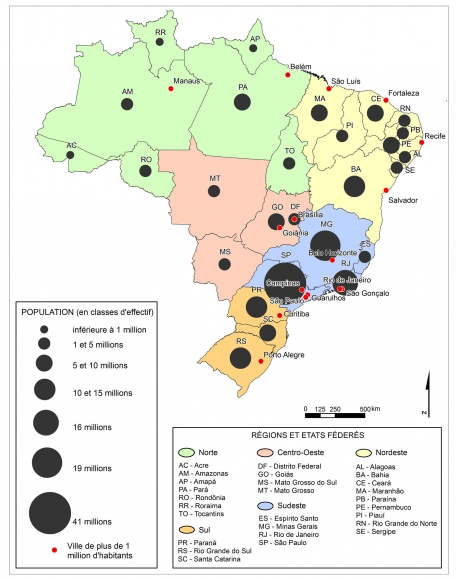

Je vais utiliser cette carte pour attribuer un environnement par client.

In [27]:
# Je crée un dictionnaire pour pouvoir créer une colonne 'environnement'
dico_env = {
    # Zone Urbaine:
    'Sud-Est': 'urbaine',

    # Zone Intermédiaire:
    'Sud': 'intermediaire',
    'Nord-Est': 'intermediaire',

    # Zone rurale:
    'Centre-Ouest': 'rurale',
    'Nord': 'rurale',

}

In [28]:
# J'applique mon dictionnaire pour créer ma colonne environnement.
geo['environnement'] = geo['zone'].replace(dico_env)

In [29]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zone,environnement
0,1037,-23.545621,-46.639292,sao paulo,SP,Sud-Est,urbaine
1,1046,-23.546081,-46.644820,sao paulo,SP,Sud-Est,urbaine
2,1046,-23.546129,-46.642951,sao paulo,SP,Sud-Est,urbaine
3,1041,-23.544392,-46.639499,sao paulo,SP,Sud-Est,urbaine
4,1035,-23.541578,-46.641607,sao paulo,SP,Sud-Est,urbaine
...,...,...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS,Sud,intermediaire
1000156,99950,-28.072188,-52.011272,tapejara,RS,Sud,intermediaire
1000157,99950,-28.068864,-52.012964,tapejara,RS,Sud,intermediaire
1000158,99950,-28.068639,-52.010705,tapejara,RS,Sud,intermediaire


In [30]:
geo_plot = geo.groupby('geolocation_state')[
    'geolocation_city'].nunique().reset_index()
geo_plot = geo_plot.sort_values(by='geolocation_city', ascending=False)
geo_plot.head()

,geolocation_state,geolocation_city
10,MG,1153
25,SP,810
22,RS,566
4,BA,528
17,PR,511


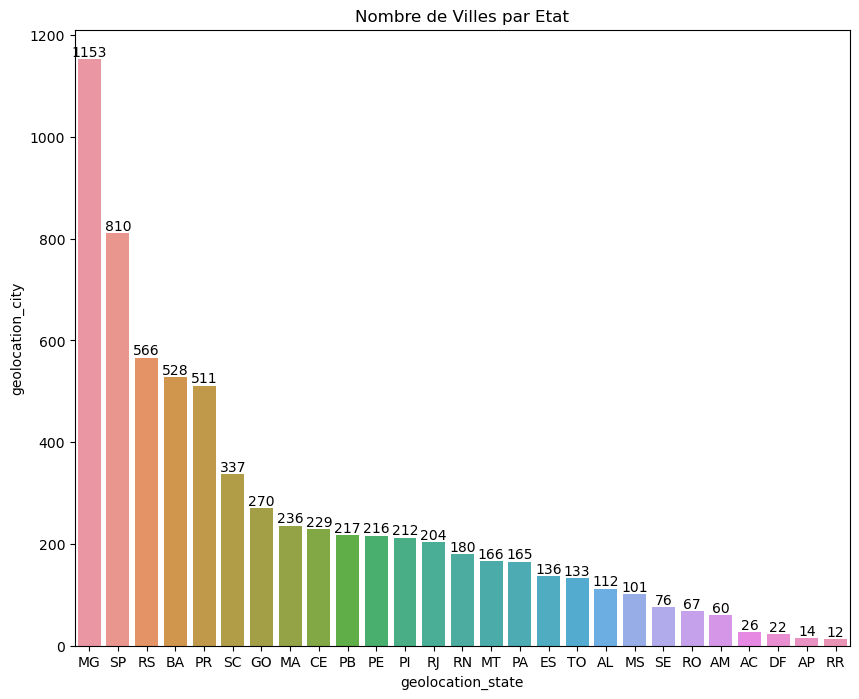

In [31]:
plt.figure(figsize=(10, 8))
ax2 = sns.barplot(
    data=geo_plot, x=geo_plot['geolocation_state'], y=geo_plot['geolocation_city'])
ax2.bar_label(ax2.containers[0])
plt.title('Nombre de Villes par Etat')
plt.show()

Minas Gerais est l'état qui compte le plus de villes.

In [32]:
geo_plot_2 = geo.groupby('zone')['geolocation_city'].nunique().reset_index()
geo_plot_2 = geo_plot_2.sort_values(by='geolocation_city', ascending=False)
geo_plot_2.head()

,zone,geolocation_city
4,Sud-Est,2278
2,Nord-Est,1821
3,Sud,1392
1,Nord,585
0,Centre-Ouest,556


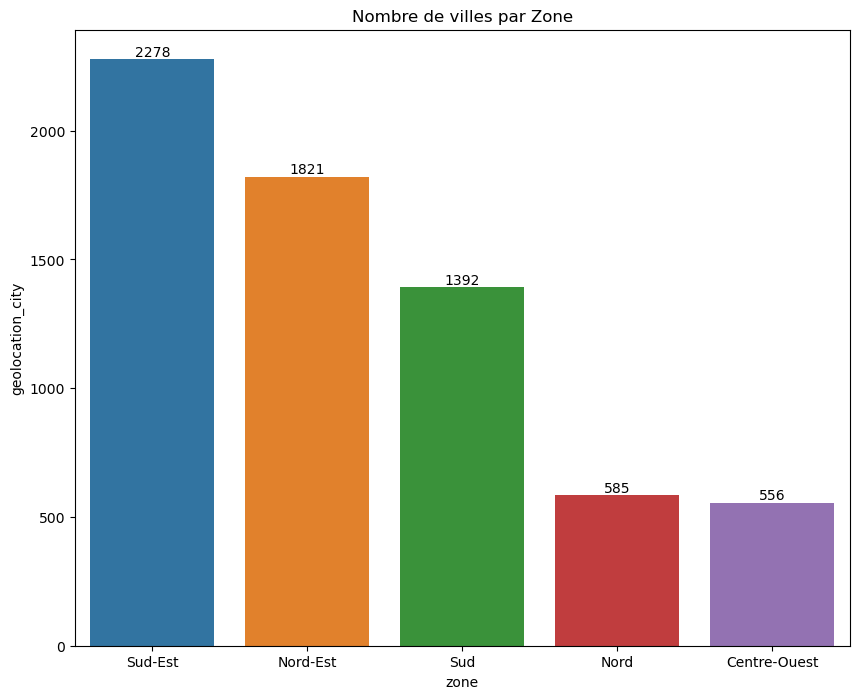

In [33]:
plt.figure(figsize=(10, 8))
ax3 = sns.barplot(
    data=geo_plot_2, x=geo_plot_2['zone'], y=geo_plot_2['geolocation_city'])
ax3.bar_label(ax3.containers[0])
plt.title('Nombre de villes par Zone')
plt.show()

La région Sud-Est compte le plus de villes.

In [34]:
geo_plot_3 = geo.groupby('environnement')[
    'geolocation_state'].nunique().reset_index()
geo_plot_3 = geo_plot_3.sort_values(by='geolocation_state', ascending=False)
geo_plot_3.head()

,environnement,geolocation_state
1,rurale,12
0,intermediaire,11
2,urbaine,4


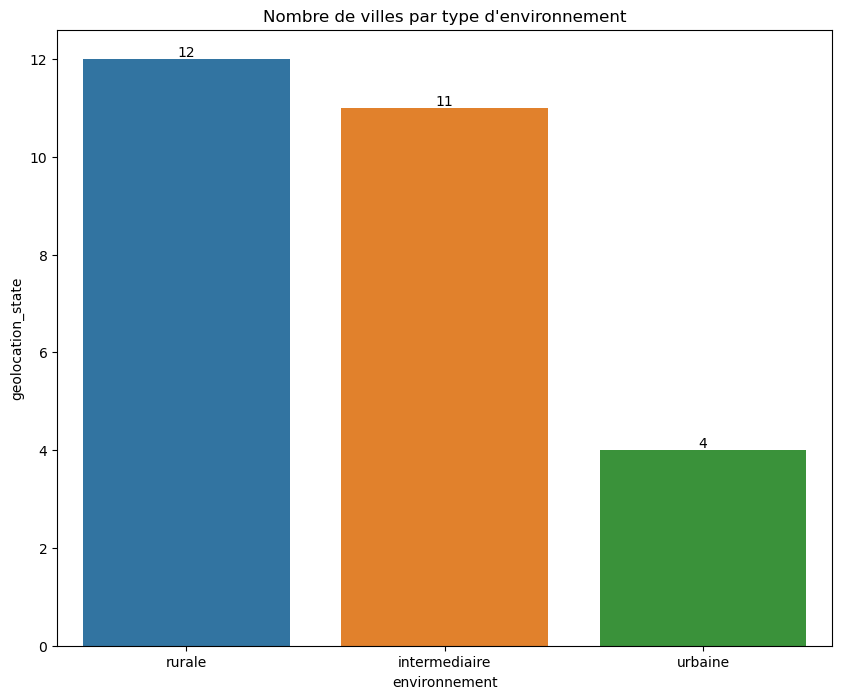

In [35]:
plt.figure(figsize=(10, 8))
ax3_1 = sns.barplot(
    data=geo_plot_3, x=geo_plot_3['environnement'], y=geo_plot_3['geolocation_state'])
ax3_1.bar_label(ax3_1.containers[0])
plt.title('Nombre de villes par type d\'environnement')
plt.show()

La majorité des villes sont en région rurale et intermediaire. 

**Remarques:**

* Minas Gerais, São Paulo, Rio Grande do Sul, Bahia, Paraná sont les états qui comptent le plus de villes.

* Le Brésil est découpé en 5 zones géographiques.  
* La Zone Sud-Est est celle qui compte le plus de villes.

* Le Brésil compte peu de zones urbaines comparées aux zones rurales (12 contre 4).

# Fichier 'olist_order_items_dataset.csv'<a class="anchor" id="chapter3"></a>

In [36]:
order_item = pd.read_csv('olist_order_items_dataset.csv')

In [37]:
order_item.shape

(112650, 7)

In [38]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
order_item['shipping_limit_date'] = pd.to_datetime(
    order_item['shipping_limit_date'])

In [41]:
exploration_csv(order_item)

order_id
98666
['00010242fe8c5a6d1ba2dd792cb16214' '00018f77f2f0320c557190d7a144bdd3'
 '000229ec398224ef6ca0657da4fc703e' ... 'fffce4705a9662cd70adb13d4a31832d'
 'fffe18544ffabc95dfada21779c9644f' 'fffe41c64501cc87c801fd61db3f6244']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
order_item_id
21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
product_id
32951
['4244733e06e7ecb4970a6e2683c13e61' 'e5f2d52b802189ee658865ca93d83a8f'
 'c777355d18b72b67abbeef9df44fd0fd' ... 'dd469c03ad67e201bc2179ef077dcd48'
 'bbe7651fef80287a816ead73f065fc4b' '350688d9dc1e75ff97be326363655e01']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
seller_id
3095
['48436dade18ac8b2bce089ec2a041202' 'dd7ddc04e1b6c2c614352b383efe2d36'
 '5b51032eddd242adc84c38acab88f23d' ... '3fefda3299e6dfaea3466ef346a3571a'
 '80ceebb4ee9b31afb6c6a916a574a1e2' '3e35a8bb43569389d3cebef0ce820f69'

Le fichier contient 6 colonnes et 112650 lignes.

Les colonnes correspondent à:
* 'order_id' : identifiant de la commande
* 'order_item_id': nombre d'articles inclus dans la même commande
* 'product_id' : identifiant de l'article
* 'seller_id' : identifiant du vendeur
* 'shipping_limit_date' : Indique la date limite d'expédition du vendeur pour le traitement de la commande par le partenaire                             logistique.
* 'price': prix de l'article
* 'freight_value' : frais de transport

Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.

Exemple:  

Le order_id = **00143d0f86d6fbd9f9b38ab440ac16f5** a 3 articles (même produit). Chaque article a le fret calculé en fonction de ses mesures et de son poids. Pour obtenir la valeur totale du fret pour chaque commande, il vous suffit de faire la somme.

La valeur totale de order_item est : 21.33 * 3 = 63.99

La valeur totale du fret est de : 15.10 * 3 = 45.30

La valeur totale de la commande (produit + fret) est : 45.30 + 63.99 = 109.29

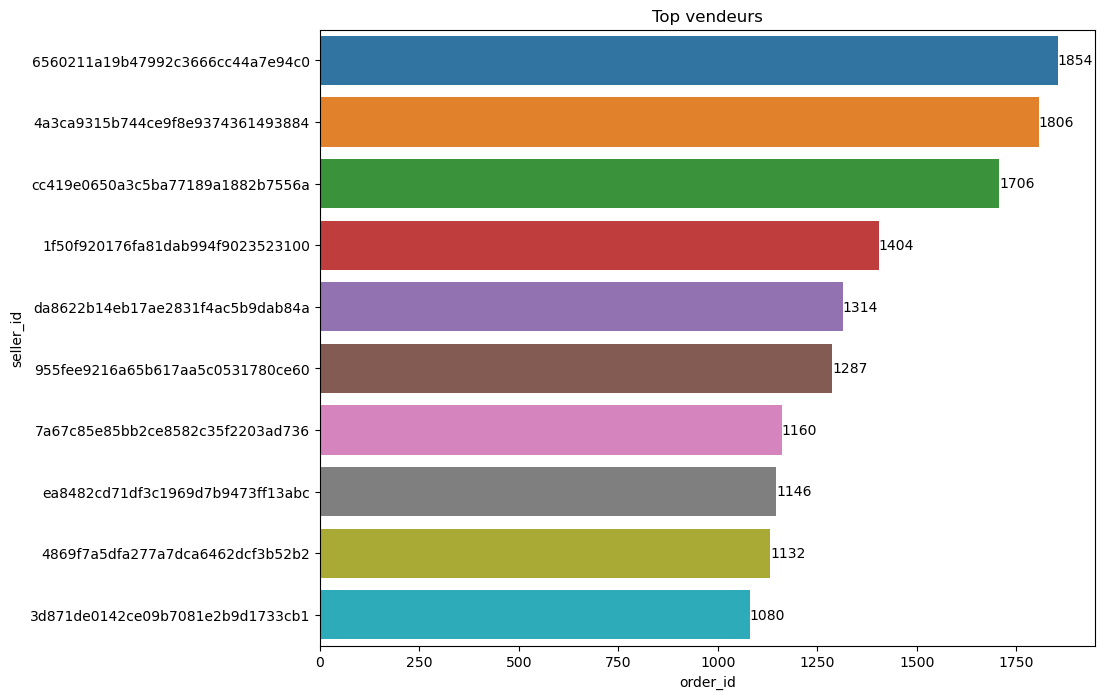

In [42]:
vendeur = order_item.groupby('seller_id')['order_id'].nunique().reset_index()
vendeur = vendeur.sort_values('order_id', ascending=False)
vendeur = vendeur[:10]
plt.figure(figsize=(10, 8))
ax4 = sns.barplot(data=vendeur, y=vendeur['seller_id'], x=vendeur['order_id'])
ax4.bar_label(ax4.containers[0])
plt.title('Top vendeurs')
plt.show()

Le meilleur vendeur comptabilise 1854 ventes.

price
5968
[ 58.9  239.9  199.   ...   7.84 399.85 736.  ]
0.85
6735.0
freight_value
6999
[ 13.29  19.93  17.87 ... 127.55   6.79   6.37]
0.0
409.68


<Figure size 640x480 with 0 Axes>

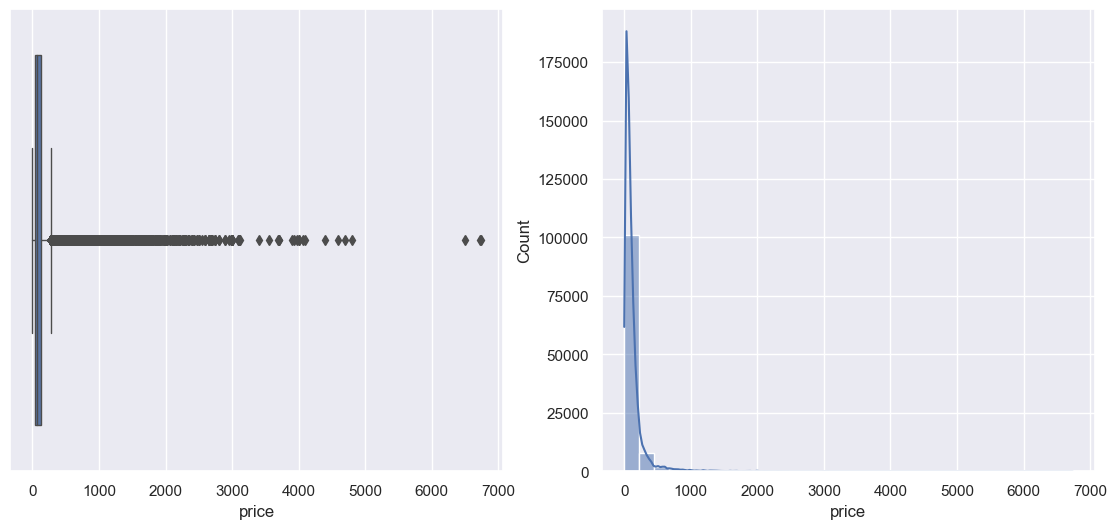

<Figure size 1400x600 with 0 Axes>

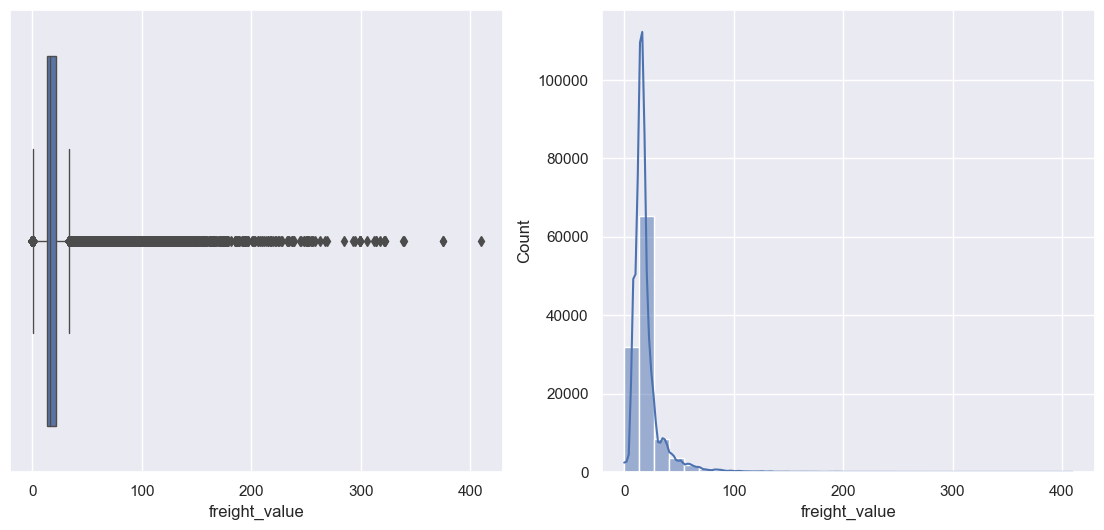

In [43]:
exploration_number(order_item)

In [44]:
order_item = order_item.sort_values('order_id')
order_item.loc[order_item['order_item_id'] > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [45]:
# Je crée une colonne total afin d'obtenir le prix de l'article avec les frais de port.
order_item['total'] = (order_item['price'] + order_item['freight_value'])

In [46]:
order_item.loc[order_item['order_item_id'] > 1, :]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,63.27
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,36.43
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,36.43
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,42.52
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,42.52
...,...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,37.69
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,228.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,89.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,89.19


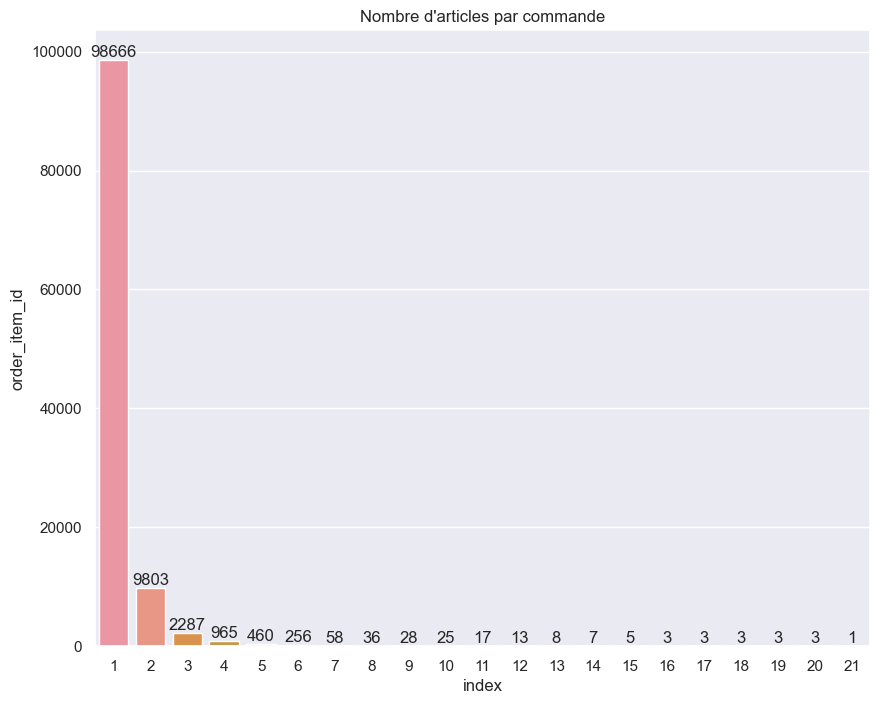

In [47]:
nbr_article = order_item['order_item_id'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax5 = sns.barplot(data=nbr_article,
                  y=nbr_article['order_item_id'], x=nbr_article['index'])
ax5.bar_label(ax5.containers[0])
plt.title('Nombre d\'articles par commande')
plt.show()

La majorité des commandes contiennent un seul article.  
Il existe une commande qui contient 21 articles.

# Fichier 'olist_order_payments_dataset.csv'<a class="anchor" id="chapter4"></a>

In [48]:
order_payment = pd.read_csv('olist_order_payments_dataset.csv')

In [49]:
order_payment.shape

(103886, 5)

In [50]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [51]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
exploration_csv(order_payment)

order_id
99440
['b81ef226f3fe1789b1e8b2acac839d17' 'a9810da82917af2d9aefd1278f1dcfa0'
 '25e8ea4e93396b6fa0d3dd708e76c1bd' ... '32609bbb3dd69b3c066a6860554a77bf'
 'b8b61059626efa996a60be9bb9320e10' '28bbae6599b09d39ca406b747b6632b1']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
payment_sequential
29
[ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
payment_type
5
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
payment_installments
24
[ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
payment_value
29077
[ 99.33  24.39  65.71 ... 205.71 100.55 363.31]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************


Le fichier contient 5 colonnes et 103886 lignes.  

Les colonnes correspondent à:
* 'order_id' : Identifiant de la commande
* 'Payment_sequential' : nombre de moyen de paiement utilisé
* 'Payment_type' : Type de paiement
* 'Payment_installments' : Nombre de versement
* 'Payment_value' : prix

payment_value
29077
[ 99.33  24.39  65.71 ... 205.71 100.55 363.31]
0.0
13664.08


<Figure size 1400x600 with 0 Axes>

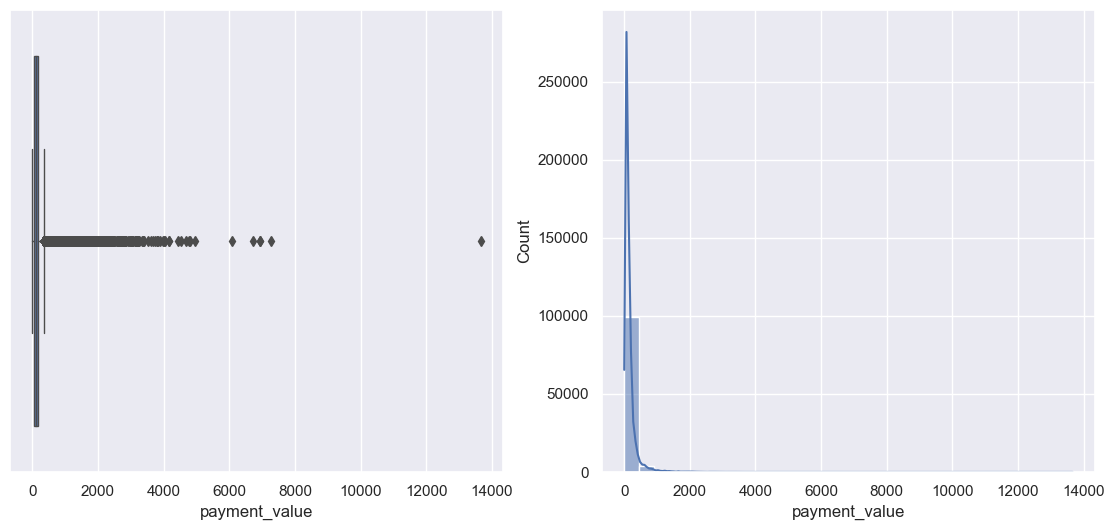

In [53]:
exploration_number(order_payment)

In [54]:
order_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

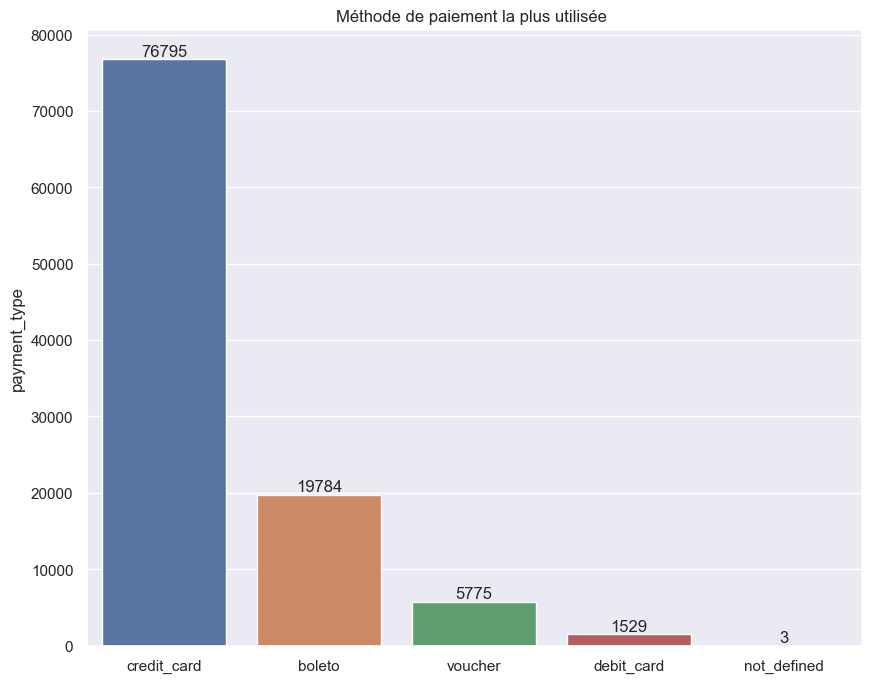

In [55]:
# Affichage des moyens de paiement utilisés
moyen_paiement = order_payment['payment_type'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax6 = sns.barplot(data=moyen_paiement,
                  y=moyen_paiement['payment_type'], x=moyen_paiement['index'])
ax6.bar_label(ax6.containers[0])
plt.title('Méthode de paiement la plus utilisée ')
plt.xlabel(None)
plt.show()

La carte de crédit est le moyen de paiement le plus utilisé.

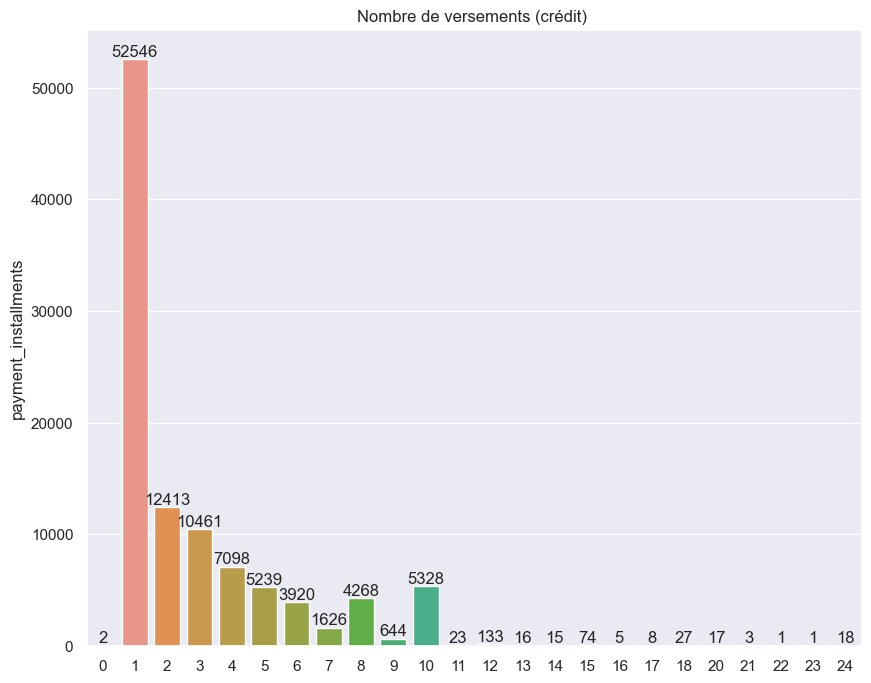

In [56]:
# Affichage des moyens de paiement utilisés
nombre_versement = order_payment['payment_installments'].value_counts(
).reset_index()
plt.figure(figsize=(10, 8))
ax6_1 = sns.barplot(data=nombre_versement,
                    y=nombre_versement['payment_installments'], x=nombre_versement['index'])
ax6_1.bar_label(ax6_1.containers[0])
plt.title('Nombre de versements (crédit) ')
plt.xlabel(None)
plt.show()

In [57]:
order_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


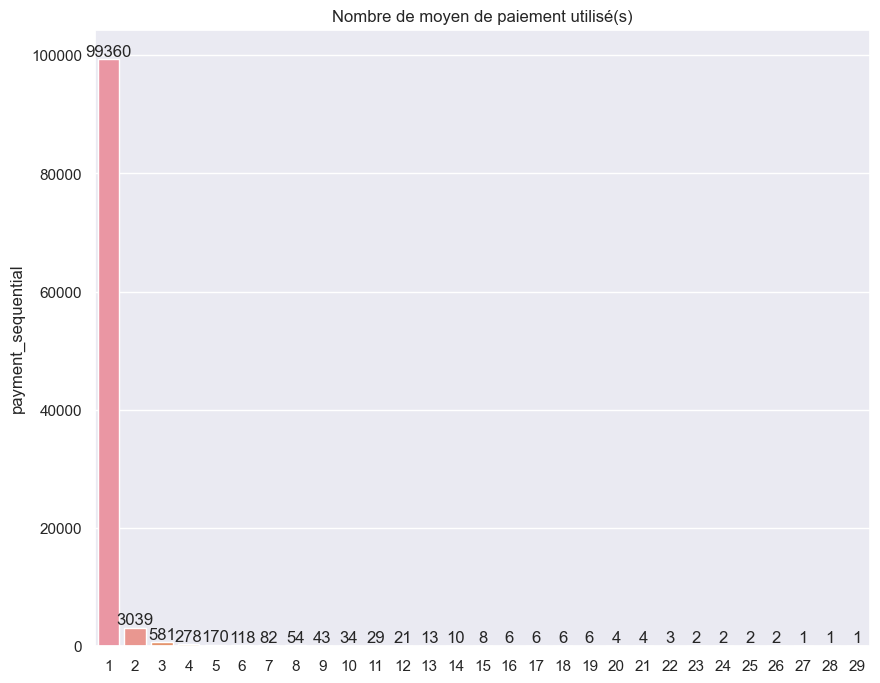

In [58]:
mensualite = order_payment['payment_sequential'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax7_ = sns.barplot(
    data=mensualite, y=mensualite['payment_sequential'], x=mensualite['index'])
ax7_.bar_label(ax7_.containers[0])
plt.title('Nombre de moyen de paiement utilisé(s)')
plt.xlabel(None)
plt.show()

La majorité des clients utilisent un mode de paiement.

# Fichier 'olist_order_reviews_dataset.csv'<a class="anchor" id="chapter5"></a>

In [59]:
order_review = pd.read_csv('olist_order_reviews_dataset.csv')

In [60]:
order_review.shape

(99224, 7)

In [61]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [62]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [63]:
order_review['review_creation_date'] = pd.to_datetime(
    order_review['review_creation_date'])
order_review['review_answer_timestamp'] = pd.to_datetime(
    order_review['review_answer_timestamp'])

In [64]:
exploration_csv(order_review)

review_id
98410
['7bc2406110b926393aa56f80a40eba40' '80e641a11e56f04c1ad469d5645fdfde'
 '228ce5500dc1d8e020d8d1322874b6f0' ... 'b3de70c89b1510c4cd3d0649fd302472'
 '1adeb9d84d72fe4e337617733eb85149' 'efe49f1d6f951dd88b51e6ccd4cc548f']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
order_id
98673
['73fc7af87114b39712e6da79b0a377eb' 'a548910a1c6147796b98fdf73dbeba33'
 'f9e4b658b201a9f2ecdecbb34bed034b' ... '55d4004744368f5571d1f590031933e4'
 '7725825d039fc1f0ceb7635e3f7d9206' '90531360ecb1eec2a1fbb265a0db0508']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
review_score
5
[4 5 1 3 2]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
review_comment_title
4527
[nan 'recomendo' 'Super recomendo' ... 'Não foi entregue o pedido'
 'OTIMA EMBALAGEM' 'Foto enganosa ']
Valeurs manquantes : 87656
Nombre de doublons : 0

*************************
review_comment_message
36159
[nan 'Recebi bem antes do prazo estipulado.'
 'Para

Le fichier contient 7 colonnes et 99224 lignes.  

Les colonnes correspondent à :  
* 'review_id' : Identifiant du commentaire
* 'order_id' : Identifiant de la commande
* 'review_score' : Score attribué à l'article commandé
* 'review_comment_title' : titre du commentaire
* 'review_comment_message : commentaire
* 'review_creation_date' : date de création du commentaire.
* 'review_answer_timestamp': date de réponse au commentaire.



In [65]:
order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


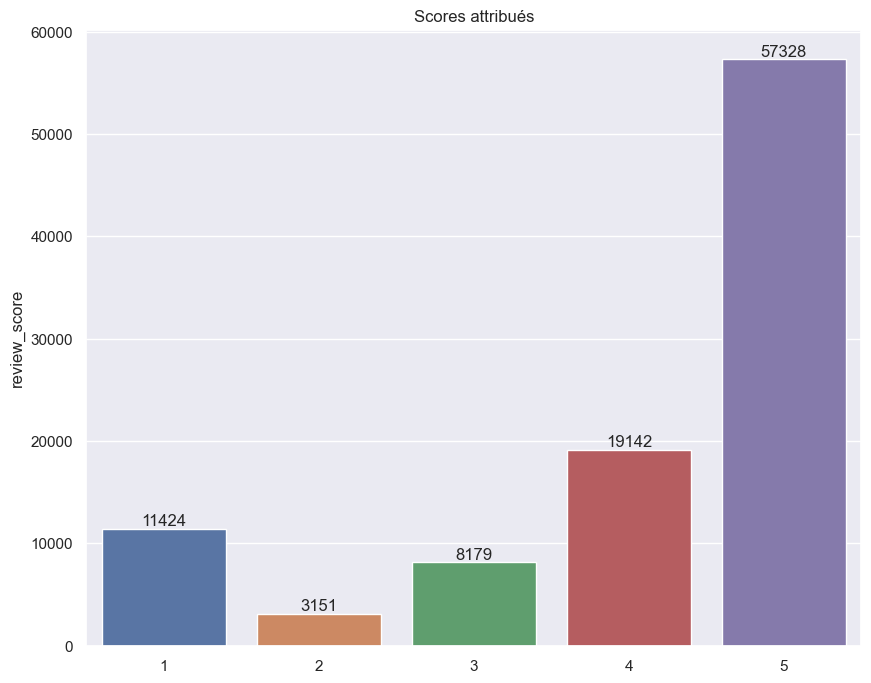

In [66]:
review = order_review['review_score'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax8 = sns.barplot(data=review, y=review['review_score'], x=review['index'])
ax8.bar_label(ax8.containers[0])
plt.title('Scores attribués')
plt.xlabel(None)
plt.show()

La majorité des scores attribués sont favorables.

In [67]:
order_review['delai_reponse'] = order_review['review_answer_timestamp'] - \
    order_review['review_creation_date']
order_review['delai_jour'] = order_review['delai_reponse'].astype(
    'timedelta64[D]').astype(int)

In [68]:
order_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delai_reponse,delai_jour
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,1
...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30,7
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42,2
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43,1
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13,1


In [69]:
order_review['delai_jour'].mean()

2.582248246392002

In [70]:
order_review['delai_jour'].median()

1.0

In [71]:
order_review['delai_jour'].max()

518

Text(0.5, 1.0, 'Boxplot du temps de réponse (jour) avec outliers')

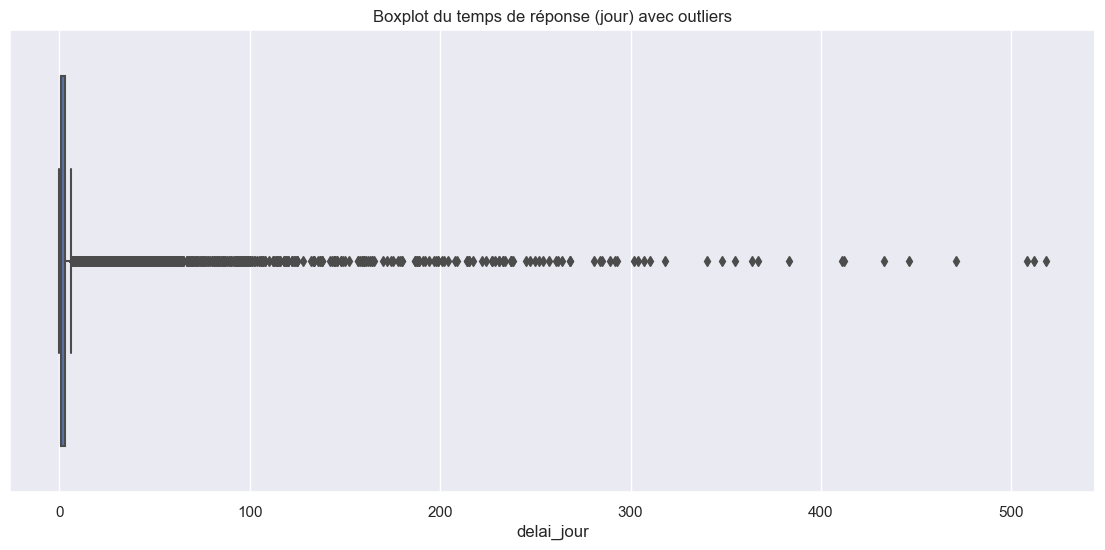

In [72]:
sns.boxplot(data=order_review, x=order_review['delai_jour'])
plt.title('Boxplot du temps de réponse (jour) avec outliers')

Le délai de réponse est globalement rapide (2 jours et demi ) mais il semble qu'une commande n'est toujours pas eu de réponse depuis 518 jours.

Text(0.5, 1.0, 'Boxplot du temps de réponse (jour) sans outliers')

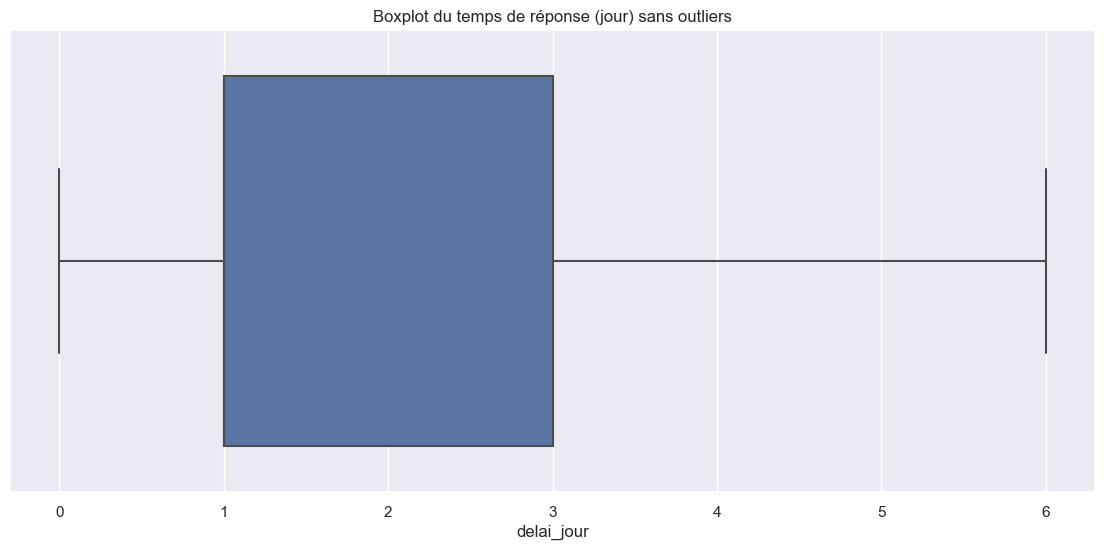

In [73]:
sns.boxplot(data=order_review, x=order_review['delai_jour'], showfliers=False)
plt.title('Boxplot du temps de réponse (jour) sans outliers')

In [74]:
order_review.loc[order_review['review_comment_title'].isna(
), 'review_comment_title'] = 'pas de titre'
order_review.loc[order_review['review_comment_message'].isna(
), 'review_comment_message'] = 'pas de message'
order_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delai_reponse,delai_jour
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,pas de titre,pas de message,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,pas de titre,pas de message,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,pas de titre,pas de message,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,pas de titre,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,pas de titre,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,1
...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,pas de titre,pas de message,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30,7
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,pas de titre,pas de message,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42,2
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,pas de titre,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43,1
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,pas de titre,pas de message,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13,1


# Fichier 'olist_orders_dataset.csv'<a class="anchor" id="chapter6"></a>

In [75]:
order_data = pd.read_csv('olist_orders_dataset.csv')

In [76]:
order_data.shape

(99441, 8)

In [77]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [78]:
order_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [79]:
for col in order_data[['order_purchase_timestamp',
                       'order_approved_at', 'order_delivered_carrier_date',
                       'order_delivered_customer_date', 'order_estimated_delivery_date']]:
    order_data[col] = pd.to_datetime(order_data[col])

In [80]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [81]:
exploration_csv(order_data)

order_id
99441
['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f07b62' '66dea50a8b16d9b4dee7af250b4be1a5']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
customer_id
99441
['9ef432eb6251297304e76186b10a928d' 'b0830fb4747a6c6d20dea0b8c802d7ef'
 '41ce2a54c0b03bf3443c3d931a367089' ... '1aa71eb042121263aafbe80c1b562c9c'
 'b331b74b18dc79bcdf6532d51e1637c1' 'edb027a75a1449115f6b43211ae02a24']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
order_status
8
['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
order_purchase_timestamp
98875
['2017-10-02T10:56:33.000000000' '2018-07-24T20:41:37.000000000'
 '2018-08-08T08:38:49.000000000' ... '2017-08-27T14:46:43.000000000'
 '2018-01-08T21:28:27.000000000' '201

Le fichier contient 7 colonnes et 99441 lignes.  

Les colonnes correspondent à :  
* 'order_id' : identifiant de la commande
* 'customer_id' : identifiant du client
* 'order_status' : état de la commande
* 'order_purchase_timestamp' : date de paiement de la commande
* 'order_approved_at': date d'approbation de la commande
* 'order_delivered_carrier_date' : date de remise de la commande au transporteur
* 'order_delivered_customer_date' : date de livraison au client
* 'order_estimated_delivery_date' : estimation du delai de livraison indiqué au client lors de l'achat


In [82]:
order_data['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

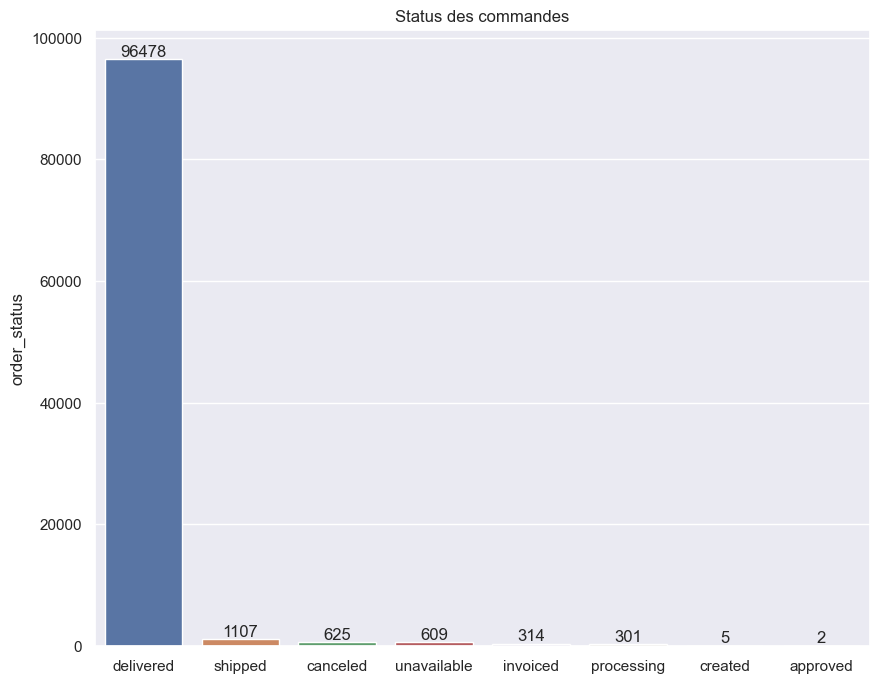

In [83]:
status = order_data['order_status'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax9 = sns.barplot(data=status, y=status['order_status'], x=status['index'])
ax9.bar_label(ax9.containers[0])
plt.title('Status des commandes')
plt.xlabel(None)
plt.show()

La majorité des commandes ont été livrées.

In [84]:
order_data.sort_values(by='order_purchase_timestamp', ascending=True)[325:330]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20049,b04bd4e0a1a21fef81b1f24f6fb81c08,bbf83aabda305a5ac059e05b342076a0,delivered,2016-10-10 18:05:54,2016-10-11 05:03:09,2016-10-15 05:03:18,2016-10-21 10:31:00,2016-11-30
23101,3d7d60b10ba4b43cf6f6d5df2e933f67,02cb3a8ef6e13d37560379559e2f533d,delivered,2016-10-10 18:09:39,2016-10-10 19:00:39,2016-10-30 14:57:59,2016-10-31 14:57:59,2016-11-30
53688,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2016-10-22 08:25:27,NaT,NaT,NaT,2016-10-24
39761,bd50a7fe9fd97ea4b7663031a319e150,0975c3cf2e418ebfa5d1191a2dffd59d,delivered,2016-12-23 23:16:47,2016-12-23 23:31:37,2016-12-27 06:14:27,2016-12-28 15:54:44,2017-01-19
78768,ec7a019261fce44180373d45b442d78f,c24fc5f9a446b4d8262041b9c64de772,delivered,2017-01-05 11:56:06,2017-01-05 12:10:17,2017-01-06 12:43:41,2017-01-11 13:14:05,2017-02-01


On remarque une abscence de données sur la période du 22 octobre 2016 au 23 décembre 2016, même chose entre le 23 décembre et 5 janiver 2017.

## Création des variables pour la segmentation

In [85]:
# Variable jour de la semaine
order_data['jour_achat'] = pd.DatetimeIndex(
    order_data['order_purchase_timestamp']).day_name()

In [86]:
# Variable mois
order_data['mois_achat'] = pd.DatetimeIndex(
    order_data['order_purchase_timestamp']).month

In [87]:
dico_saison = {
    # Hiver :
    '1': 'Hiver',
    '2': 'Hiver',
    '3': 'Hiver',

    # Printemps
    '4': 'Printemps',
    '5': 'Printemps',
    '6': 'Printemps',

    # Ete
    '7': 'Eté',
    '8': 'Eté',
    '9': 'Eté',

    # Automne
    '10': 'Automne',
    '11': 'Automne',
    '12': 'Automne'

}

In [88]:
# Variable saison
order_data['saison'] = order_data['mois_achat'].astype(
    'string').replace(dico_saison)

In [89]:
# Variable délai de livraison
order_data['délai_livraison'] = order_data['order_delivered_customer_date'] - \
    order_data['order_delivered_carrier_date']

In [90]:
# Variable retard de livraison
order_data['retard_livraison'] = order_data.apply(lambda x: True if (
    x['order_estimated_delivery_date']) < (x['order_delivered_customer_date']) else False, axis=1)

In [91]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99281 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   jour_achat                     99441 non-null  object         
 9   mois_achat                     99441 non-null  int64          
 10  saison                         99441 non-null  string         
 11  dé

# Fichier 'olist_products_dataset.csv'<a class="anchor" id="chapter7"></a>

In [92]:
product_data = pd.read_csv('olist_products_dataset.csv')

In [93]:
product_data.shape

(32951, 9)

In [94]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [95]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [96]:
exploration_csv(product_data)

product_id
32951
['1e9e8ef04dbcff4541ed26657ea517e5' '3aa071139cb16b67ca9e5dea641aaa2f'
 '96bd76ec8810374ed1b65e291975717f' ... '9a7c6041fa9592d9d9ef6cfe62a71f8c'
 '83808703fc0706a22e264b9d75f04a2e' '106392145fca363410d287a815be6de4']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
product_category_name
73
['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'const

Ce fichier contient 9 colonnes et 32915 lignes.  

Les colonnes correspondent à :  
* 'product_id' : identifiant du produit
* 'product_category_name' : catégorie du produit
* 'product_name_lenght' : nombre de lettres contenues dans le nom du produit
* 'product_description_lenght' : nombre de lettres contenues dans la description du produit
* 'product_photos_qty' : nombre de photos disponibles avec le produit
* 'product_weight_g' : poids du produit en gramme
* 'product_length_cm' : longueur du produit en cm
* 'product_height_cm' : hauteur du produit en cm
* 'product_width_cm' : largeur du produit en cm

**Remarques :**  
* 610 articles ne contiennent pas d'informations sur leur catégorie, titre, description, nombre de photo.
* 2 articles n'ont pas d'informations sur leur poid et dimensions

In [97]:
product_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


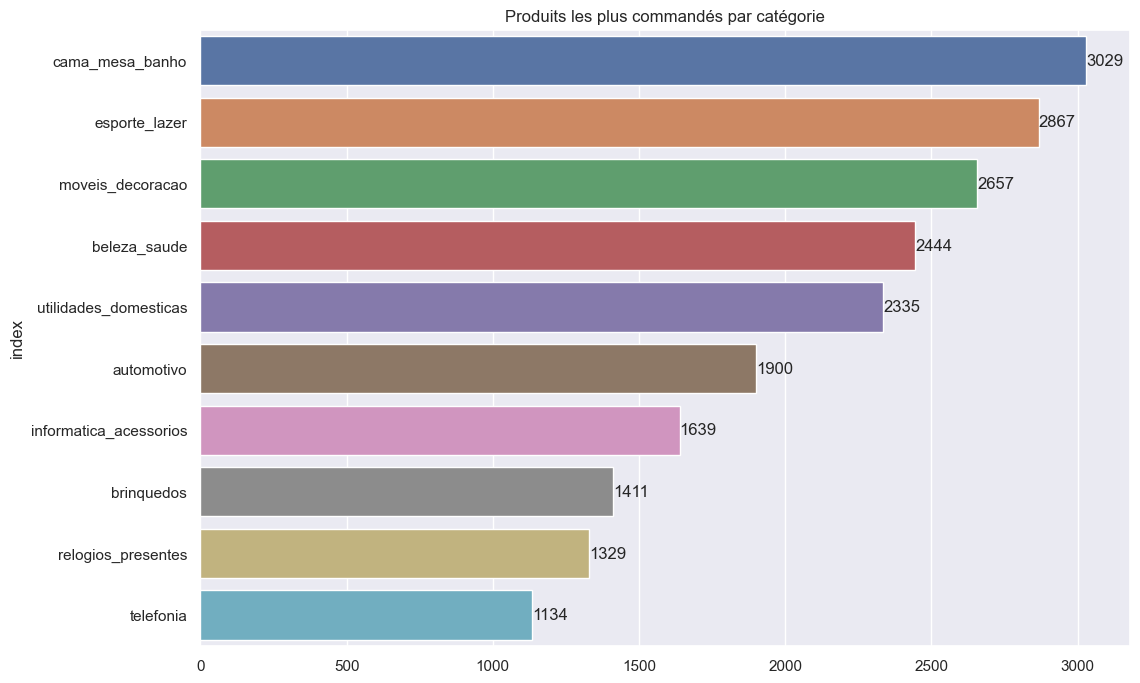

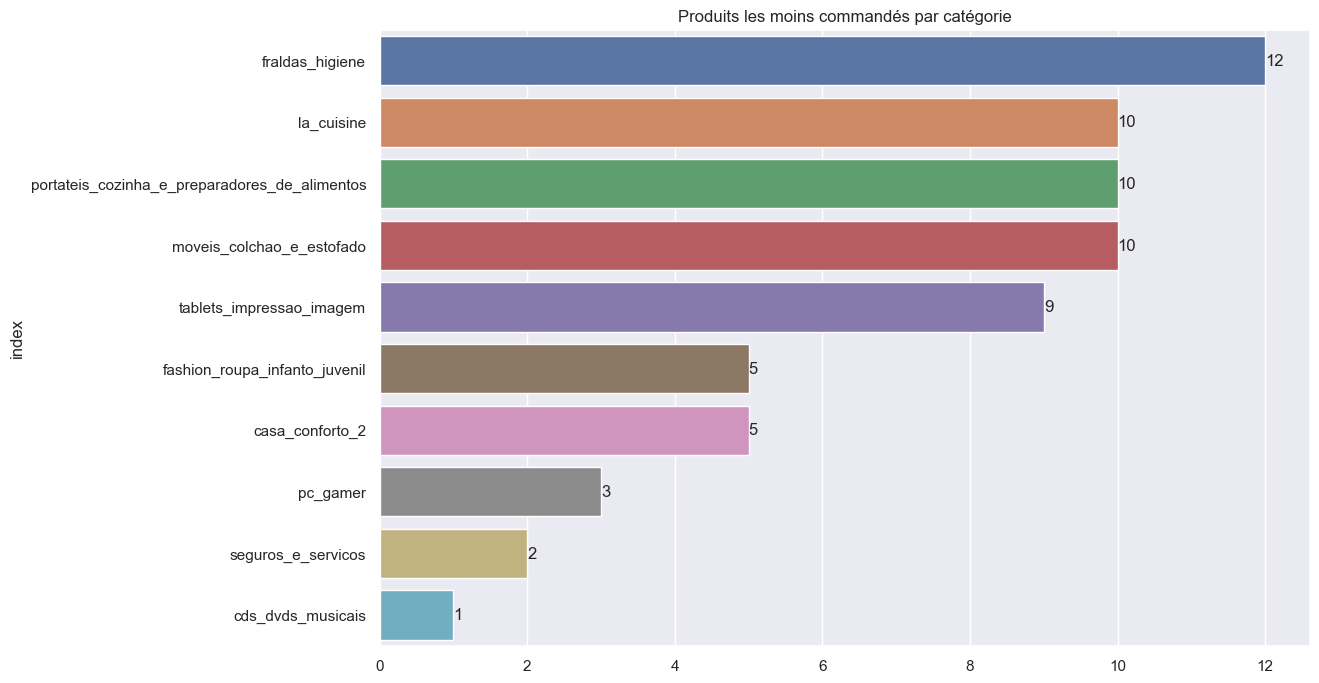

In [98]:
categorie = product_data['product_category_name'].value_counts().reset_index()
categorie_top = categorie.head(10)
categorie_flop = categorie.tail(10)

plt.figure(figsize=(12, 8))
ax10 = sns.barplot(data=categorie_top,
                   x=categorie_top['product_category_name'], y=categorie_top['index'])
ax10.bar_label(ax10.containers[0])
plt.title('Produits les plus commandés par catégorie')
plt.xlabel(None)
plt.show()

plt.figure(figsize=(12, 8))
ax11 = sns.barplot(data=categorie_flop,
                   x=categorie_flop['product_category_name'], y=categorie_flop['index'])
ax11.bar_label(ax11.containers[0])
plt.title('Produits les moins commandés par catégorie')
plt.xlabel(None)
plt.show()

cama_mesa_banho : bed_bath_table (semble désigner le linge de maison ou bien des décorations d'intérieurs) arrive en tête des ventes.  
Les Cds et DVD sont les produits les moins commandés.

# Fichier 'olist_sellers_dataset.csv'<a class="anchor" id="chapter8"></a>

In [99]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [100]:
sellers.shape

(3095, 4)

In [101]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [102]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [103]:
exploration_csv(sellers)

seller_id
3095
['3442f8959a84dea7ee197c632cb2df15' 'd1b65fc7debc3361ea86b5f14c68d2e2'
 'ce3ad9de960102d0677a81f5d0bb7b2d' ... '74871d19219c7d518d0090283e03c137'
 'e603cf3fec55f8697c9059638d6c8eb5' '9e25199f6ef7e7c347120ff175652c3b']
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
seller_zip_code_prefix
2246
[13023 13844 20031 ...  4650 96080 12051]
Valeurs manquantes : 0
Nombre de doublons : 0

*************************
seller_city
611
['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo ant

Le fichier contient 4 colonnes et 3095 lignes.  

Les colonnes correspondent à :
* 'seller_id' : identifiant du vendeur
* 'seller_zip_code_prefix' : préfixe du code postal du vendeur
* 'seller_city' : Ville de résidence du vendeur
* 'seller_state' : état de résidence du vendeur

In [104]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


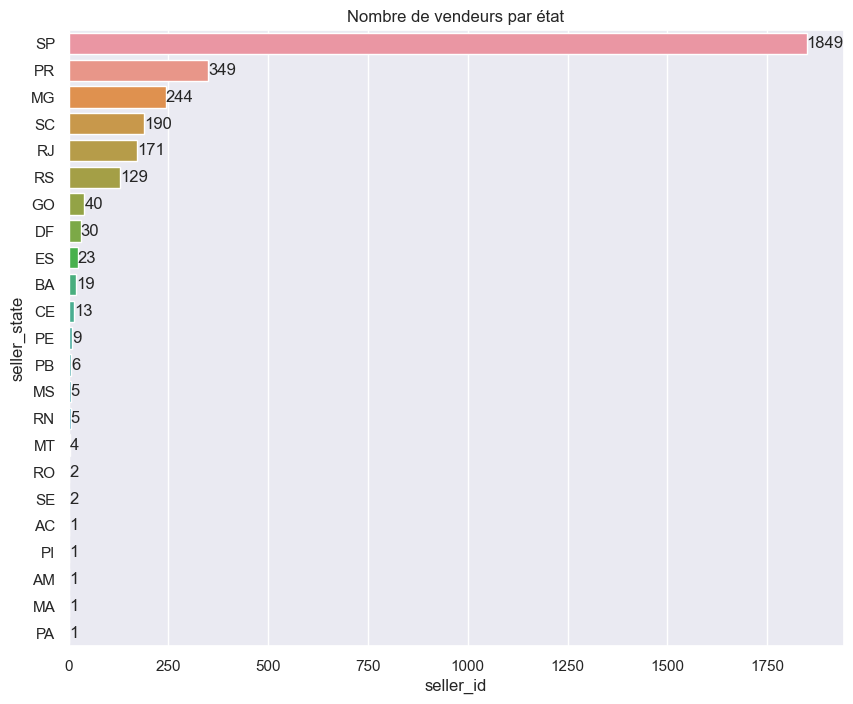

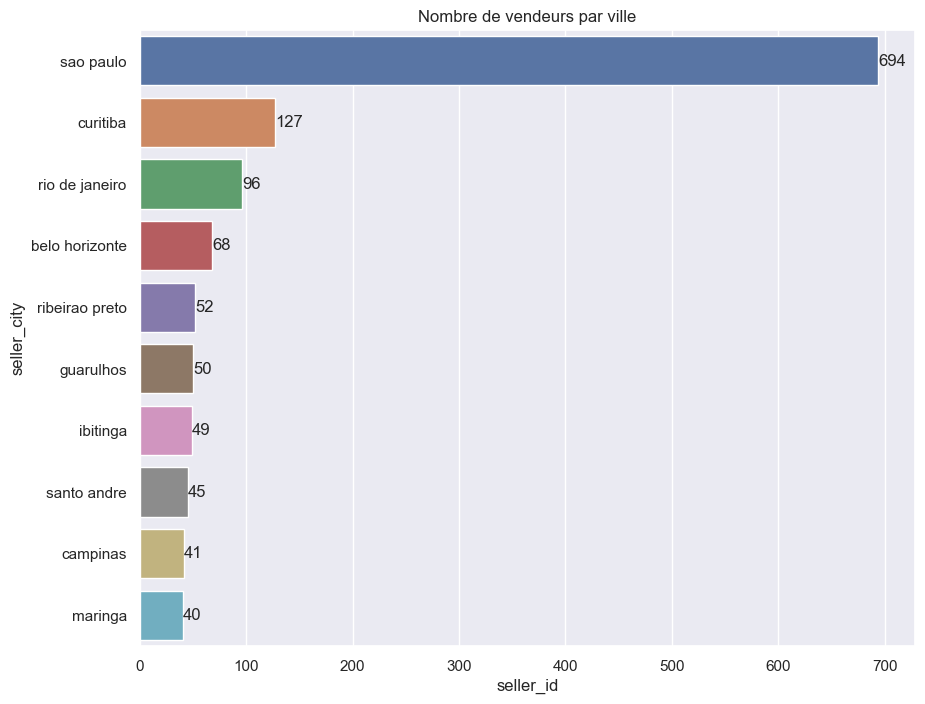

In [105]:
seller_state = sellers.groupby('seller_state')[
    'seller_id'].nunique().reset_index()
seller_state = seller_state.sort_values(by='seller_id', ascending=False)

plt.figure(figsize=(10, 8))
ax12 = sns.barplot(data=seller_state,
                   y=seller_state['seller_state'], x=seller_state['seller_id'])
ax12.bar_label(ax12.containers[0])
plt.title('Nombre de vendeurs par état')
plt.show()

seller_city = sellers.groupby('seller_city')[
    'seller_id'].nunique().reset_index()
seller_city = seller_city.sort_values(by='seller_id', ascending=False)
seller_city = seller_city.head(10)

plt.figure(figsize=(10, 8))
ax13 = sns.barplot(
    data=seller_city, y=seller_city['seller_city'], x=seller_city['seller_id'])
ax13.bar_label(ax13.containers[0])
plt.title('Nombre de vendeurs par ville')
plt.show()

La majorité des vendeurs se trouvent à Sao Paulo.

# Fichier 'product_category_name_translation.csv'<a class="anchor" id="chapter9"></a>

In [106]:
translate = pd.read_csv('product_category_name_translation.csv')

In [107]:
translate.shape

(71, 2)

In [108]:
translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [109]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [110]:
dico_translate = dict(zip(
    translate['product_category_name'], translate['product_category_name_english']))

In [111]:
exploration_csv(translate)

product_category_name
71
['beleza_saude' 'informatica_acessorios' 'automotivo' 'cama_mesa_banho'
 'moveis_decoracao' 'esporte_lazer' 'perfumaria' 'utilidades_domesticas'
 'telefonia' 'relogios_presentes' 'alimentos_bebidas' 'bebes' 'papelaria'
 'tablets_impressao_imagem' 'brinquedos' 'telefonia_fixa'
 'ferramentas_jardim' 'fashion_bolsas_e_acessorios' 'eletroportateis'
 'consoles_games' 'audio' 'fashion_calcados' 'cool_stuff'
 'malas_acessorios' 'climatizacao' 'construcao_ferramentas_construcao'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'construcao_ferramentas_jardim' 'fashion_roupa_masculina' 'pet_shop'
 'moveis_escritorio' 'market_place' 'eletronicos' 'eletrodomesticos'
 'artigos_de_festas' 'casa_conforto' 'construcao_ferramentas_ferramentas'
 'agro_industria_e_comercio' 'moveis_colchao_e_estofado' 'livros_tecnicos'
 'casa_construcao' 'instrumentos_musicais' 'moveis_sala'
 'construcao_ferramentas_iluminacao' 'industria_comercio_e_negocios'
 'alimentos' 'artes' 'moveis_quarto

Le fichier contient 2 colonnes et 71 lignes.  
Les colonnes correspondent aux catégories de produits écrit en portugais et la deuxième est la traduction en anglais.  


# Jointure des fichiers<a class="anchor" id="chapter10"></a>

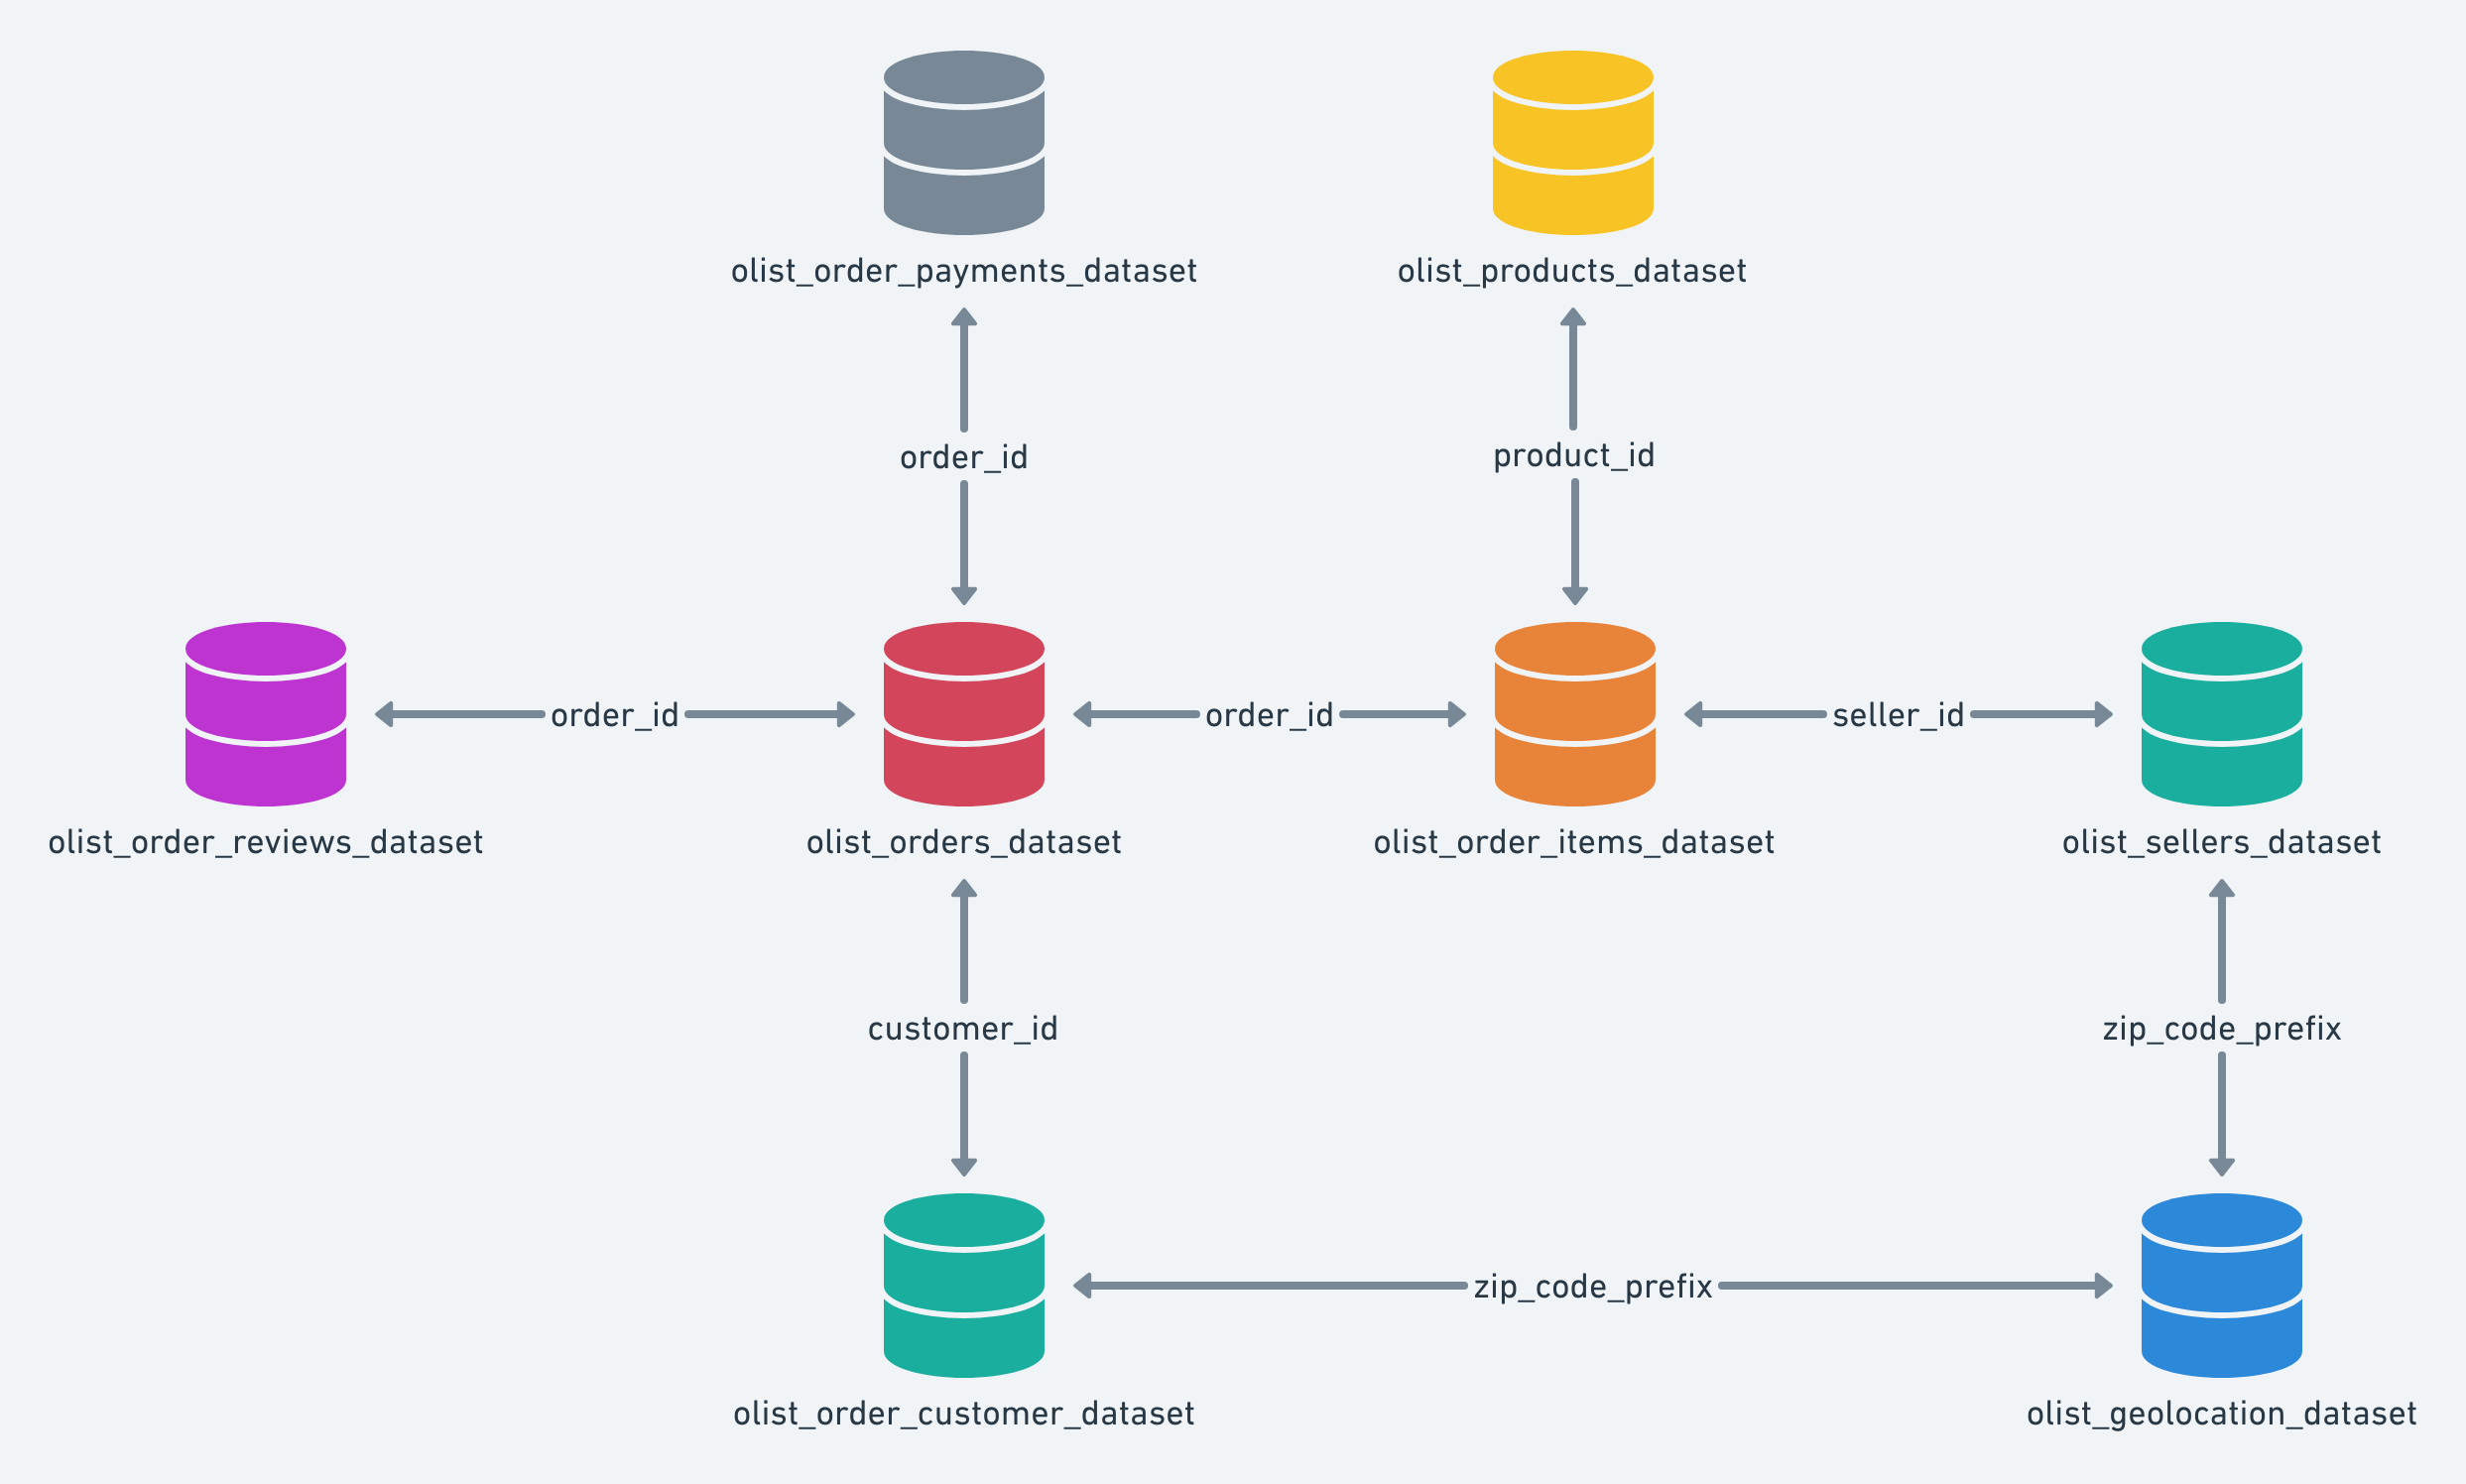

In [112]:
# Jointure de customers et order_data
df1 = pd.merge(customer, order_data, on='customer_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99441 non-null  object         
 1   customer_unique_id             99441 non-null  object         
 2   customer_zip_code_prefix       99441 non-null  int64          
 3   customer_city                  99441 non-null  object         
 4   customer_state                 99441 non-null  object         
 5   order_id                       99441 non-null  object         
 6   order_status                   99441 non-null  object         
 7   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 8   order_approved_at              99281 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns] 
 10  order_delivered_customer_date  96476 non-null  datetime64[ns] 
 11  or

In [113]:
# Jointure de df1 et order_review
df1 = pd.merge(df1, order_review, on='order_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99224 non-null  object         
 1   customer_unique_id             99224 non-null  object         
 2   customer_zip_code_prefix       99224 non-null  int64          
 3   customer_city                  99224 non-null  object         
 4   customer_state                 99224 non-null  object         
 5   order_id                       99224 non-null  object         
 6   order_status                   99224 non-null  object         
 7   order_purchase_timestamp       99224 non-null  datetime64[ns] 
 8   order_approved_at              99068 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   97468 non-null  datetime64[ns] 
 10  order_delivered_customer_date  96359 non-null  datetime64[ns] 
 11  or

In [114]:
# Jointure de df1 et de order_payment
df1 = pd.merge(df1, order_payment, on='order_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 0 to 103676
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    103677 non-null  object         
 1   customer_unique_id             103677 non-null  object         
 2   customer_zip_code_prefix       103677 non-null  int64          
 3   customer_city                  103677 non-null  object         
 4   customer_state                 103677 non-null  object         
 5   order_id                       103677 non-null  object         
 6   order_status                   103677 non-null  object         
 7   order_purchase_timestamp       103677 non-null  datetime64[ns] 
 8   order_approved_at              103506 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   101816 non-null  datetime64[ns] 
 10  order_delivered_customer_date  100647 non-null  datetime

In [115]:
# Jointure de df1 et de order_items
df1 = pd.merge(df1, order_item, on='order_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

In [116]:
# Jointure de df1 et data_products sur la clé product_id
df1 = pd.merge(df1, product_data, on='product_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

In [117]:
# Jointure de df1 et de sellers
df1 = pd.merge(df1, sellers, on='seller_id', how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

In [118]:
# Traduction de la colonne product category name
df1['product_category_name'] = df1['product_category_name'].replace(
    dico_translate)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

In [119]:
# Je rajoute à mon fichier une variable proximité vendeur / client

df1['proxi_city'] = df1.apply(
    lambda x: True if x['customer_city'] == x['seller_city'] else False, axis=1)

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

In [121]:
# Je vais appliquer mes dictionnaires dico_zone et dico_environnement
# customer
df1['cust_zone'] = df1['customer_state'].replace(dico_zone)
df1['cust_env'] = df1['cust_zone'].replace(dico_env)

# seller
df1['seller_zone'] = df1['seller_state'].replace(dico_zone)
df1['seller_env'] = df1['seller_zone'].replace(dico_env)

In [122]:
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,jour_achat,mois_achat,saison,délai_livraison,retard_livraison,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delai_reponse,delai_jour,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,proxi_city,cust_zone,cust_env,seller_zone,seller_env
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,Tuesday,5,Printemps,1 days 23:47:38,False,88b8b52d46df026a9d1ad2136a59b30b,4,pas de titre,pas de message,2017-05-26,2017-05-30 22:34:40,4 days 22:34:40,4,...,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,False,Sud-Est,urbaine,Sud-Est,urbaine
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,Thursday,11,Automne,5 days 22:26:13,False,7fc63200f12eebb5f387856afdd63db8,1,pas de titre,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,2 days 19:41:59,2,...,1,275.79,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,False,Nord,rurale,Sud-Est,urbaine
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,Thursday,11,Automne,5 days 22:26:13,False,7fc63200f12eebb5f387856afdd63db8,1,pas de titre,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,2 days 19:41:59,2,...,1,275.79,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,False,Nord,rurale,Sud-Est,urbaine
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,Sunday,5,Printemps,6 days 13:37:33,False,251191809e37c1cffc16865947c18a4d,3,pas de titre,"Produto compatível com seu valor, muito bonito...",2017-05-27,2017-05-28 02:43:16,1 days 02:43:16,1,...,7,140.61,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,False,Sud,intermediaire,Sud-Est,urbaine
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,Saturday,2,Hiver,9 days 02:47:13,False,f7123bac5b91a0e2e38d8b41fd1206f4,4,pas de titre,Entregou antes do prazo,2018-03-01,2018-03-02 11:11:24,1 days 11:11:24,1,...,10,137.58,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,False,Sud-Est,urbaine,Sud-Est,urbaine
...,...,..

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117329 non-null  object         
 1   customer_unique_id             117329 non-null  object         
 2   customer_zip_code_prefix       117329 non-null  int64          
 3   customer_city                  117329 non-null  object         
 4   customer_state                 117329 non-null  object         
 5   order_id                       117329 non-null  object         
 6   order_status                   117329 non-null  object         
 7   order_purchase_timestamp       117329 non-null  datetime64[ns] 
 8   order_approved_at              117314 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116094 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114858 non-null  datetime

# Valeurs manquantes

<AxesSubplot: >

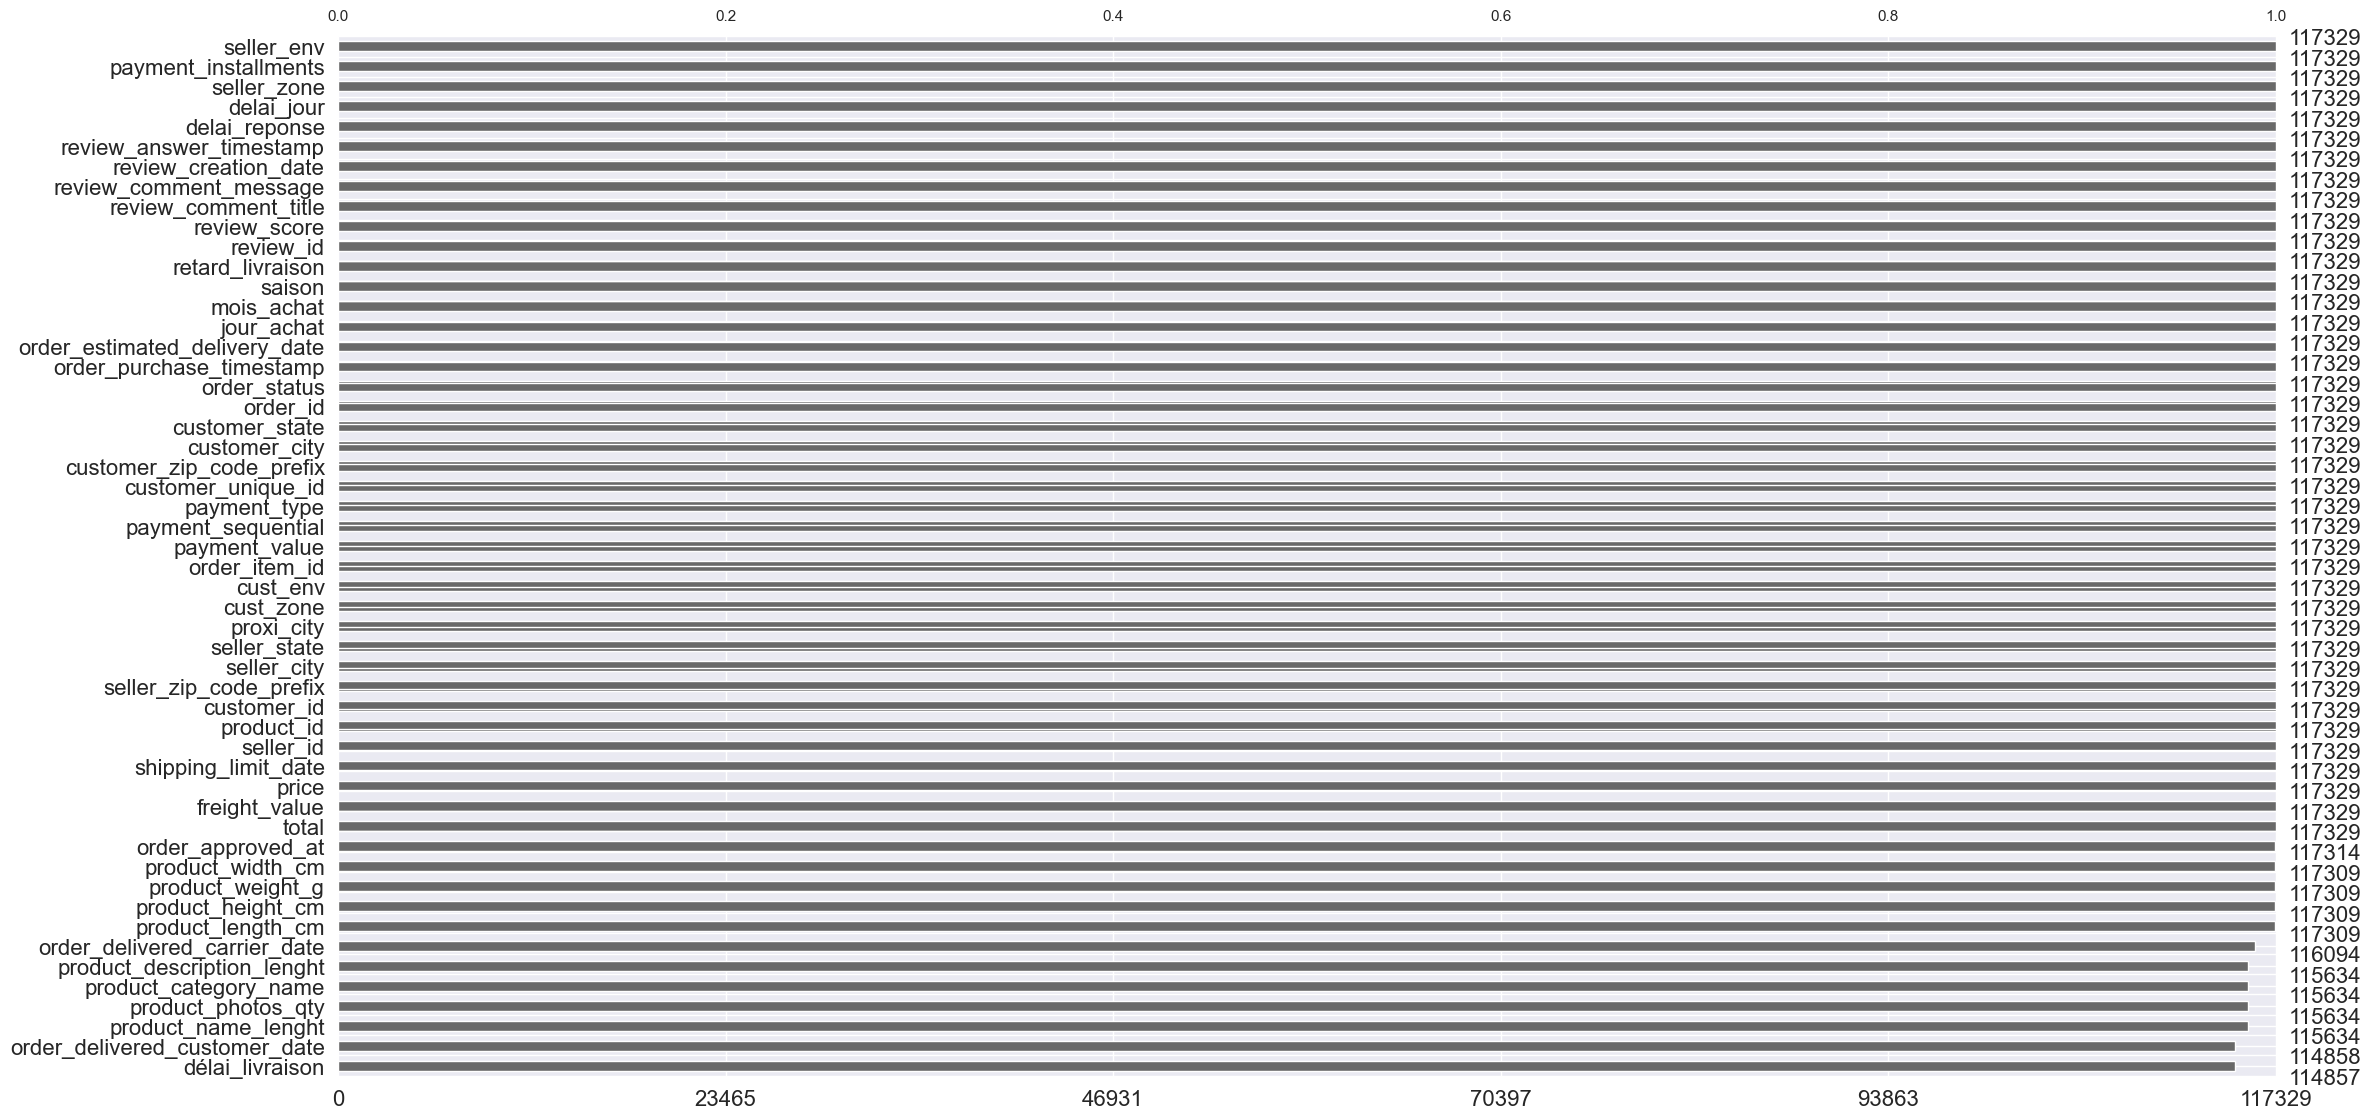

In [124]:
msno.bar(df1, sort='ascending')

In [125]:
df1.loc[df1['product_weight_g'].isna()]['product_id'].value_counts()

5eb564652db742ff8f28759cd8d2652a    19
09ff539a621711667c43eba6a3bd8466     1
Name: product_id, dtype: int64

In [126]:
df1.loc[df1['product_height_cm'].isna()]['product_id'].value_counts()

5eb564652db742ff8f28759cd8d2652a    19
09ff539a621711667c43eba6a3bd8466     1
Name: product_id, dtype: int64

In [127]:
df1.loc[df1['product_height_cm'].isna()]['order_status'].value_counts()

delivered    20
Name: order_status, dtype: int64

Tous ces produits ont été livrés. 


Ces articles n'ont pas assez d'informations pour que je puisse les utiliser par la suite.  
Je les supprime.

In [128]:
df1 = df1.drop(df1.loc[df1['product_height_cm'].isna()].index)

In [129]:
df1.loc[df1['product_category_name'].isna()]['product_id'].value_counts()

5a848e4ab52fd5445cdc07aab1c40e48    195
b1d207586fca400a2370d50a9ba1da98     49
76d1a1a9d21ab677a61c3ae34b1b352f     32
3b60d513e90300a4e9833e5cda1f1d61     29
ad88641611c35ebd59ecda07a9f17099     29
                                   ... 
9b13a7d22318479913aa50b379d41726      1
6962734c72522e70e852a2a77d21a730      1
ff8bb42702f38636b348fd7e2332ce2f      1
cbe24747d52ccb72f4fd7190c41aff73      1
66a5ffd1047bfd6230ac214e03257bae      1
Name: product_id, Length: 604, dtype: int64

In [130]:
# J'impute par la valeur 'unknown'
df1.loc[df1['product_category_name'].isna(), 'product_category_name'] = 'unknown'

In [131]:
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=False)[:15]

délai_livraison                  0.021073
order_delivered_customer_date    0.021064
product_name_lenght              0.014287
product_description_lenght       0.014287
product_photos_qty               0.014287
order_delivered_carrier_date     0.010528
order_approved_at                0.000128
customer_id                      0.000000
product_weight_g                 0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
total                            0.000000
dtype: float64

In [132]:
df1.loc[df1['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1167
canceled        546
invoiced        370
processing      370
delivered         8
unavailable       7
approved          3
Name: order_status, dtype: int64

Tous les produits qui contiennent des valeurs manquantes n'ont pas été livrés.

df1.loc[df1['order_delivered_customer_date'].isna(),:]

df1.loc[df1['commande_livrée_date_client'].isna(),:]

<AxesSubplot: >

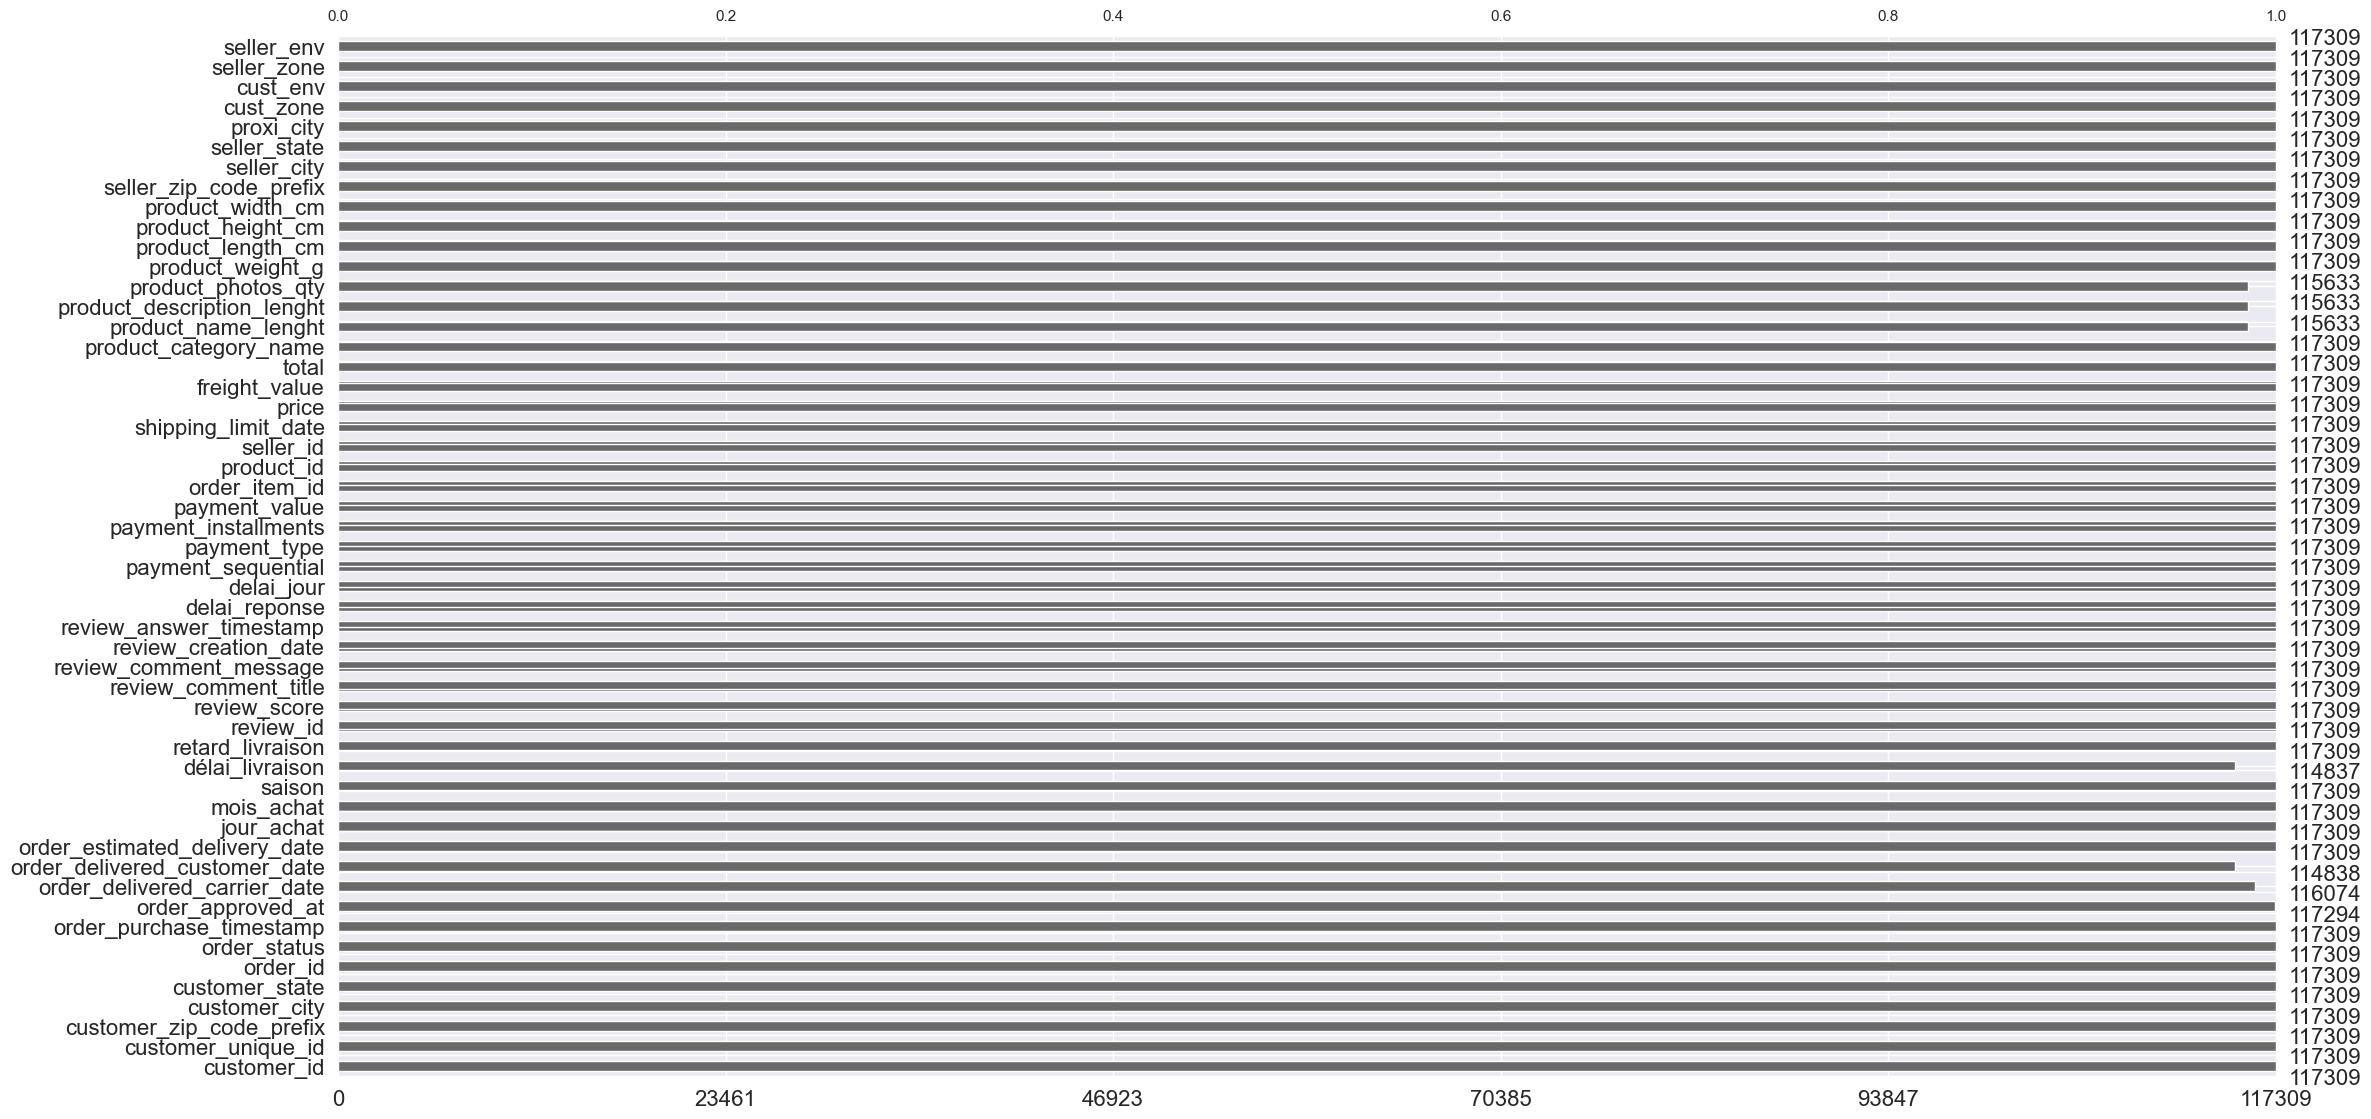

In [133]:
msno.bar(df1)

In [134]:
df1.dtypes.value_counts()

object             20
float64            11
datetime64[ns]      8
int64               7
timedelta64[ns]     2
bool                2
string              1
int32               1
dtype: int64

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117309 entries, 0 to 117328
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117309 non-null  object         
 1   customer_unique_id             117309 non-null  object         
 2   customer_zip_code_prefix       117309 non-null  int64          
 3   customer_city                  117309 non-null  object         
 4   customer_state                 117309 non-null  object         
 5   order_id                       117309 non-null  object         
 6   order_status                   117309 non-null  object         
 7   order_purchase_timestamp       117309 non-null  datetime64[ns] 
 8   order_approved_at              117294 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116074 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114838 non-null  datetime

In [136]:
for col in df1.select_dtypes('int64'):
    df1[col] = df1[col].astype('int32')

In [137]:
df1.dtypes.value_counts()

object             20
float64            11
int32               8
datetime64[ns]      8
timedelta64[ns]     2
bool                2
string              1
dtype: int64

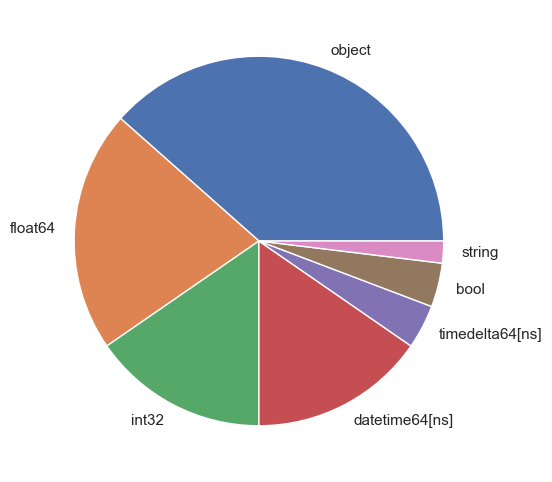

In [138]:
plt.pie(x=df1.dtypes.value_counts().values,
        labels=df1.dtypes.value_counts().index)
plt.show()

# Preprocessing<a class="anchor" id="chapter11"></a>

## Regroupement des catégories de produits

In [139]:
df1['product_category_name'].unique()

array(['office_furniture', 'furniture_decor', 'auto', 'sports_leisure',
       'furniture_living_room', 'baby', 'housewares',
       'kitchen_dining_laundry_garden_furniture', 'home_confort',
       'bed_bath_table', 'toys', 'home_comfort_2', 'cool_stuff',
       'computers_accessories', 'musical_instruments', 'consoles_games',
       'watches_gifts', 'unknown', 'health_beauty', 'perfumery',
       'home_construction', 'garden_tools', 'small_appliances',
       'stationery', 'air_conditioning', 'telephony',
       'construction_tools_construction', 'electronics', 'pet_shop',
       'fixed_telephony', 'food_drink', 'drinks', 'food', 'market_place',
       'signaling_and_security', 'diapers_and_hygiene', 'audio',
       'fashion_bags_accessories', 'construction_tools_safety',
       'fashio_female_clothing', 'luggage_accessories', 'fashion_shoes',
       'art', 'books_general_interest', 'fashion_male_clothing', 'music',
       'dvds_blu_ray', 'construction_tools_lights', 'christmas_suppl

sur le site d'Olist, il est possible de trouver la liste des catégories de produits.  

https://ajuda.olist.com/hc/pt-br/articles/4409254604564-Saiba-quais-s%C3%A3o-as-categorias-dispon%C3%ADveis-para-vender  

Toutefois, certaines catégories peuvent encore être regroupées (ex :food, drink, food_drink)

In [140]:
# Création d'un dictionnaire pour créer une nouvelle colonne de catégories
dico_categ = {
    # health & beauty
    'health_beauty': "beauty",
    'perfumery': "beauty",

    # computers & electronics
    'computers_accessories': "computers",
    'telephony': "computers",
    'watches_gifts': "computers",
    'tablets_printing_image': "computers",
    'fixed_telephony': "computers",
    'consoles_games': "computers",
    'audio': "computers",
    'electronics': "computers",
    'small_appliances': "computers",
    'computers': "computers",


    # auto
    'auto': "auto",

    # home
    'bed_bath_table': "home",
    'furniture_decor': "home",
    'housewares': "home",
    'air_conditioning': "home",
    'furniture_mattress_and_upholstery': "home",
    'furniture_living_room': "home",
    'kitchen_dining_laundry_garden_furniture': "home",
    'home_appliances': "home",
    'home_confort': "home",
    'furniture_bedroom': "home",
    'la_cuisine': "home",
    'home_appliances_2': "home",
    'home_comfort_2': "home",
    'small_appliances_home_oven_and_coffee': "home",
    'portateis_cozinha_e_preparadores_de_alimentos': "home",


    # food & drink
    'food_drink': "food_drink",
    'drinks': "food_drink",
    'food': "food_drink",

    # Children
    'baby': "children",
    'toys': "children",
    'fashion_childrens_clothes': "children",
    'diapers_and_hygiene': "children",



    # pet & garden
    'garden_tools': "pet_garden",
    'costruction_tools_garden': "pet_garden",
    'flowers': "pet_garden",
    'pet_shop': "pet_garden",

    # fashion
    'fashion_shoes': "fashion",
    'luggage_accessories': "fashion",
    'fashion_bags_accessories': "fashion",
    'fashion_male_clothing': "fashion",
    'fashion_underwear_beach': "fashion",
    'fashion_sport': "fashion",
    'fashio_female_clothing': "fashion",

    # construction
    'construction_tools_construction': "construction",
    'costruction_tools_tools': "construction",
    'home_construction': "construction",
    'construction_tools_lights': "construction",
    'construction_tools_safety': "construction",


    # party
    'party_supplies': "party",
    'christmas_supplies': "party",

    # office
    'stationery': "office",
    'office_furniture': "office",
    'agro_industry_and_commerce': "office",
    'industry_commerce_and_business': "office",
    'signaling_and_security': "office",
    'security_and_services': "office",


    # culture & entertainment
    'art': "culture_entertainment",
    'books_technical': "culture_entertainment",
    'books_general_interest': "culture_entertainment",
    'books_imported': "culture_entertainment",
    'cine_photo': "culture_entertainment",
    'music': "culture_entertainment",
    'cds_dvds_musicals': "culture_entertainment",
    'dvds_blu_ray': "culture_entertainment",
    'musical_instruments': "culture_entertainment",
    'sports_leisure': "culture_entertainment",
    'arts_and_craftmanship': "culture_entertainment",

    # other
    'cool_stuff': "other",
    'market_place': "other",

    # unknown
    'unknown': 'unknown'

}

In [141]:
# J'utilise le dictionnaire pour créer une colonne main_category
df1['main_category'] = df1['product_category_name'].replace(dico_categ)

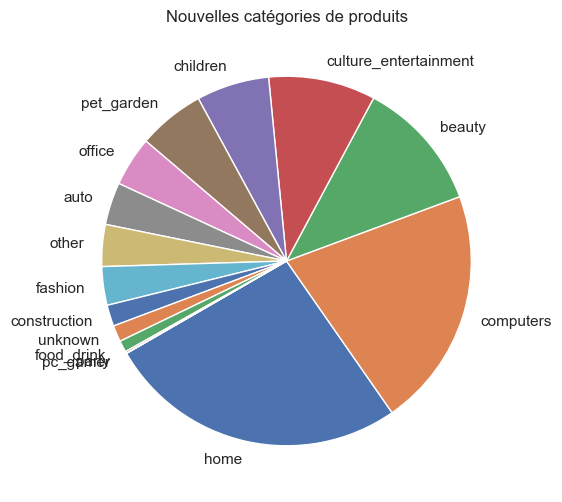

In [142]:
plt.pie(x=df1['main_category'].value_counts().values,
        labels=df1['main_category'].value_counts().index,
        startangle=210)
plt.title('Nouvelles catégories de produits')
plt.show()

# Création de nouvelles variables

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117309 entries, 0 to 117328
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    117309 non-null  object         
 1   customer_unique_id             117309 non-null  object         
 2   customer_zip_code_prefix       117309 non-null  int32          
 3   customer_city                  117309 non-null  object         
 4   customer_state                 117309 non-null  object         
 5   order_id                       117309 non-null  object         
 6   order_status                   117309 non-null  object         
 7   order_purchase_timestamp       117309 non-null  datetime64[ns] 
 8   order_approved_at              117294 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   116074 non-null  datetime64[ns] 
 10  order_delivered_customer_date  114838 non-null  datetime

In [144]:
# Variable nombre de commande par client
df1['nombre_commande'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    "order_id"].transform('count')

In [145]:
# Variable nombre de produits achetés
df1['nombre_produits'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    "product_id"].transform('count')

In [146]:
# Variable nombre de produits différents achetés
df1['produit_different'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    "product_id"].transform('nunique')

In [147]:
# Variable catégorie la plus prisée du client
df1['top_categ'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'main_category'].transform('max')

In [148]:
# Variable somme totale des frais de port
df1['total_freight'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'freight_value'].transform('sum')

In [149]:
# Variable somme totale sans frais de port
df1['total_price'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'price'].transform('sum')

In [150]:
# Variable somme totale
df1['total_commande'] = df1['total_price'] + df1['total_freight']

In [151]:
# Variable moyenne des notes attribuées
df1['review_mean'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'review_score'].transform('mean')

In [152]:
# Variable moyen de paiement le plus utilisé
df1['top_payment'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'payment_type'].transform('max')

In [153]:
# Variable paiement par crédit
df1['moy_mensualite'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'payment_installments'].transform('mean')

In [154]:
# Variable paiement par crédit
df1['paiement_credit'] = df1.apply(
    lambda x: True if x['moy_mensualite'] > 1 else False, axis=1)

In [155]:
import numpy as np
bins = [0, 30, 80, 150, np.inf]
names = ['pas cher', 'modere', 'cher', 'tres cher']

df1['niveau_prix'] = pd.cut(df1['price'], bins, labels=names)

In [156]:
import datetime as dt
NOW = dt.datetime(2018, 8, 30)
df1['order_purchase_timestamp'] = pd.to_datetime(
    df1['order_purchase_timestamp'])

In [157]:
# Variable Recency
recent_date = df1['order_purchase_timestamp'].max()
df1['Recency'] = df1['order_purchase_timestamp'].apply(
    lambda x: (recent_date - x).days)

In [158]:
# Variable frequency
df1['frequency'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'order_id'].transform('count')

In [159]:
# Variable Monetary value
df1['monetary'] = df1.groupby(["customer_unique_id", 'customer_id'])[
    'total_commande'].transform('max')

In [160]:
df1['monetary'].describe()

count    117309.000000
mean        217.129179
std         470.175196
min          10.070000
25%          68.350000
50%         121.090000
75%         213.450000
max       13664.080000
Name: monetary, dtype: float64

In [161]:
# Suppression des doublons
df1 = df1.drop_duplicates(subset=['customer_id'])

In [162]:
df2 = df1.copy()

# Analyse exploratoire<a class="anchor" id="chapter12"></a>

In [163]:
# Calcul du CA total
print("Le chiffre d'affaires total est de : {:,.1f} euros.".format(
    df2.price.sum()).replace(',', ' '))

Le chiffre d'affaires total est de : 12 310 973.1 euros.


In [164]:
df2['année'] = df2['order_purchase_timestamp'].dt.year
df2['mois'] = df2['order_purchase_timestamp'].dt.month
df2["mois"] = df2['mois'].map("{:02}".format)
df2['jour'] = df2['order_purchase_timestamp'].dt.day
df2['année_mois'] = df2["année"].astype(str) + "-" + df2["mois"].astype(str)

In [165]:
ca_anne = df2.groupby('année')['total'].sum().reset_index()
ca_anne = ca_anne.sort_values(by='année', ascending=False)
commande_annee = df2.groupby('année')['order_id'].count().reset_index()

ca_saison = df2.groupby(['saison'])['total'].sum().reset_index()
commande_saison = df2.groupby(['saison'])['order_id'].count().reset_index()

ca_mois = df2.groupby(['année_mois'])['total'].sum().reset_index()
ca_mois = ca_mois.sort_values(by='année_mois', ascending=True)
commande_mois = df2.groupby(['année_mois'])['order_id'].count().reset_index()

ca_semaine = df2.groupby(['jour_achat'])['total'].sum().reset_index()
commande_semaine = df2.groupby(['jour_achat'])[
    'order_id'].count().reset_index()

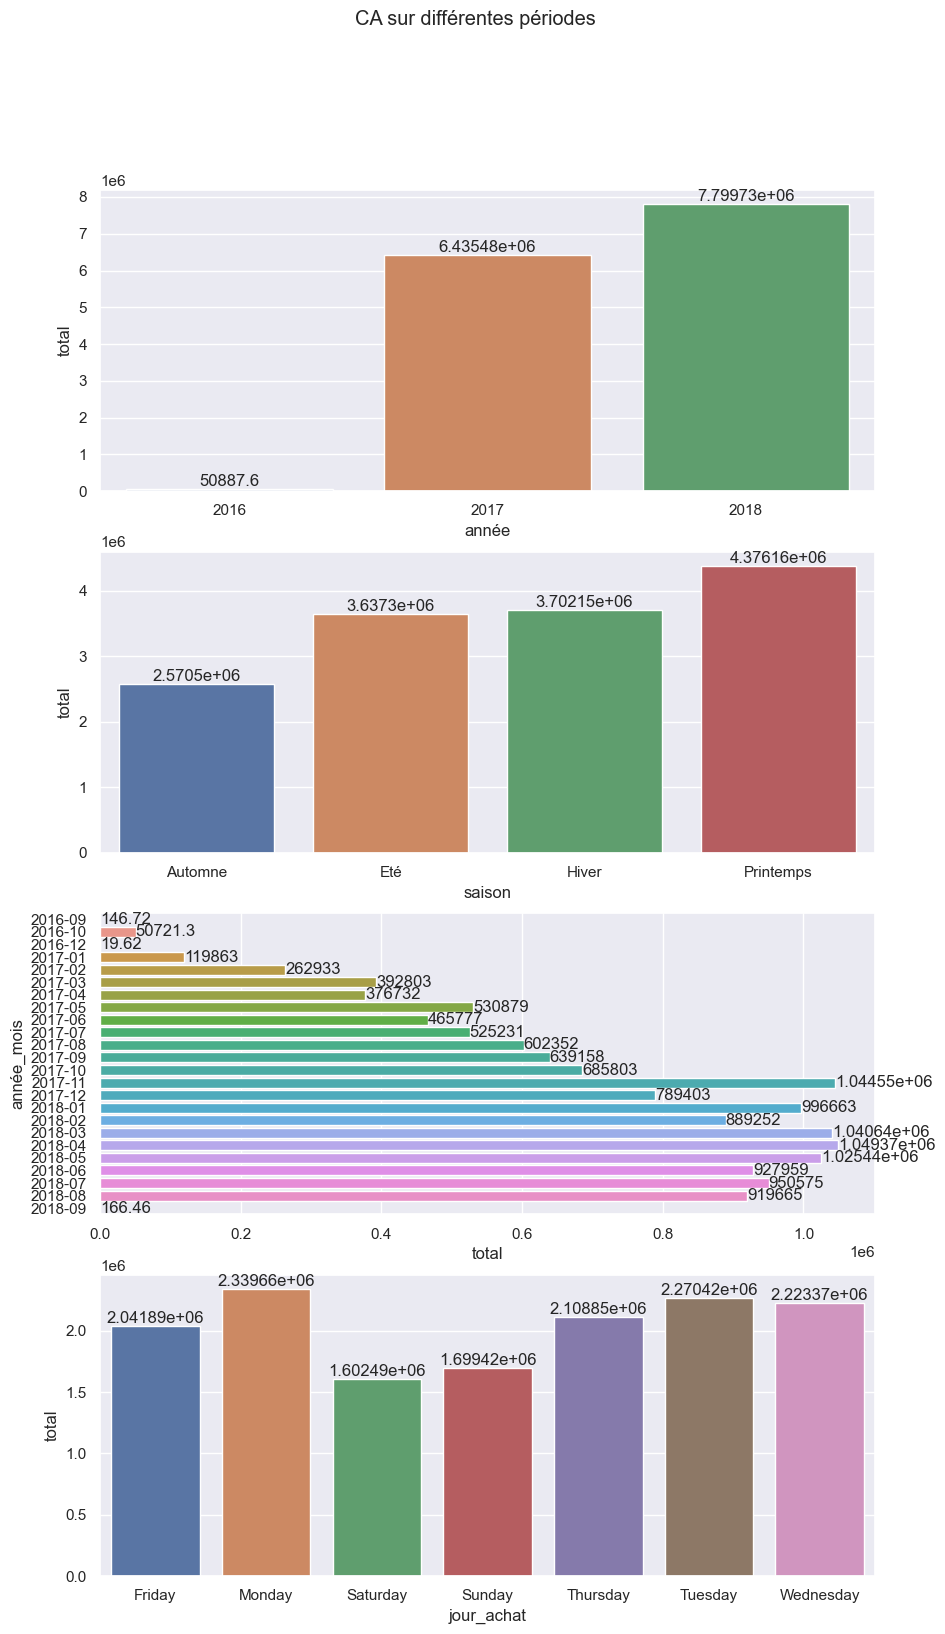

In [166]:
# Affichage du CA sur différentes périodes

fig, axes = plt.subplots(4, 1, figsize=(10, 18))
plt.suptitle('CA sur différentes périodes')
sns.barplot(data=ca_anne, x=ca_anne['année'], y=ca_anne['total'], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])

sns.barplot(data=ca_saison,
            x=ca_saison['saison'], y=ca_saison['total'], ax=axes[1])
axes[1].bar_label(axes[1].containers[0])

sns.barplot(data=ca_mois, y=ca_mois['année_mois'],
            x=ca_mois['total'], ax=axes[2])
axes[2].bar_label(axes[2].containers[0])

sns.barplot(data=ca_semaine,
            x=ca_semaine['jour_achat'], y=ca_semaine['total'], ax=axes[3])
axes[3].bar_label(axes[3].containers[0])

plt.show()

Le chiffre d'affaire est croissant depuis 2016.  
Le meilleur CA réalisé

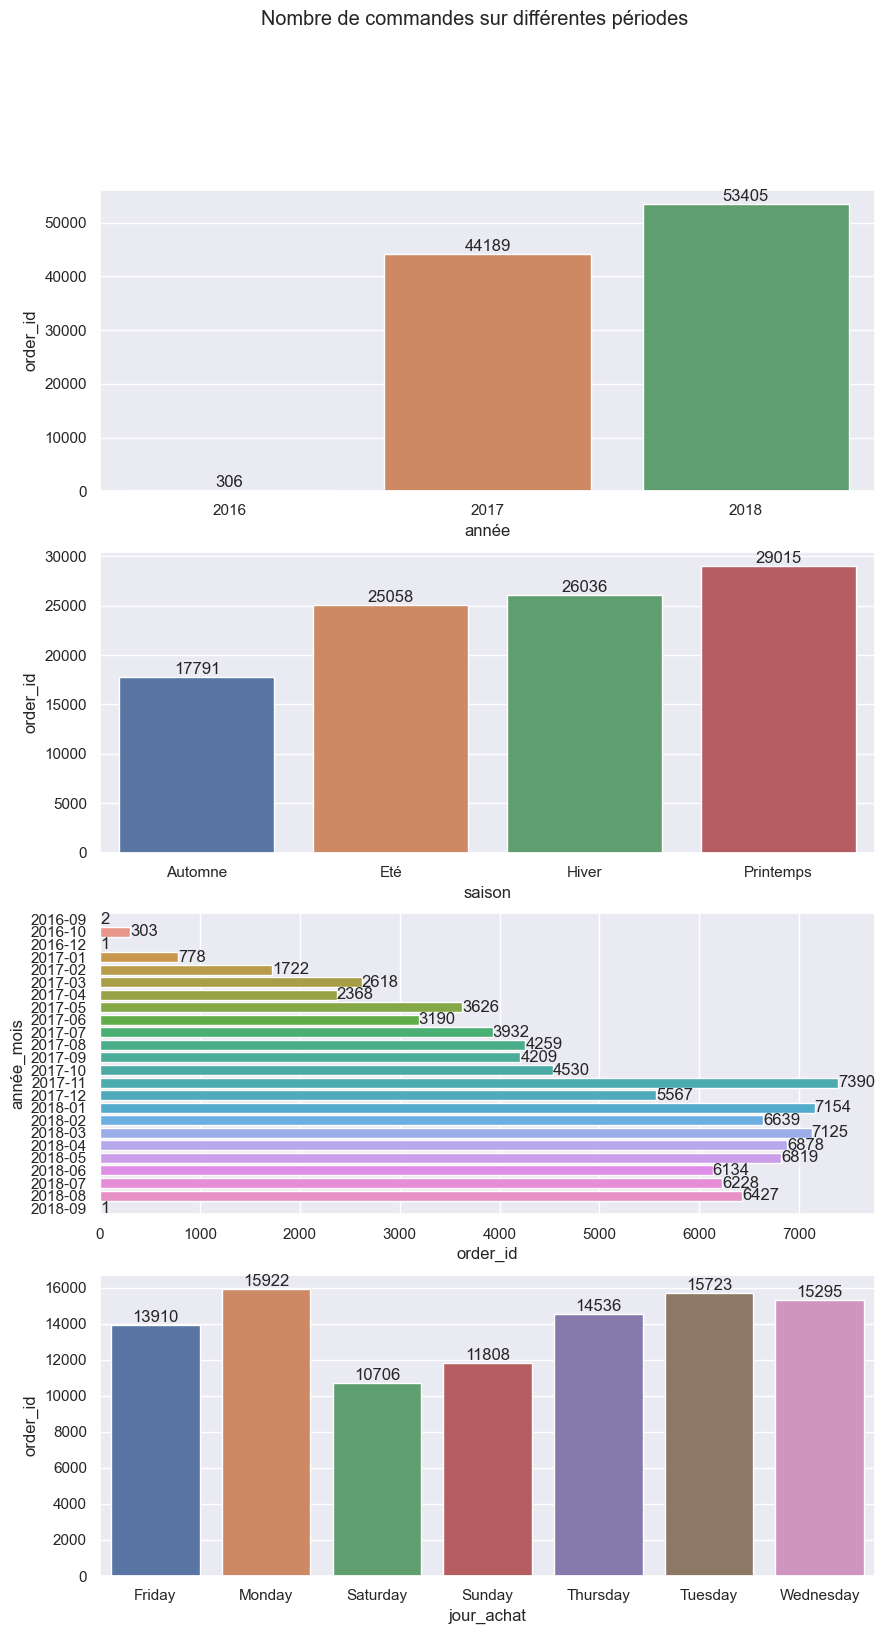

In [167]:
# Affichage du commande sur différentes périodes

fig, axes = plt.subplots(4, 1, figsize=(10, 18))
plt.suptitle('Nombre de commandes sur différentes périodes')
sns.barplot(data=commande_annee,
            x=commande_annee['année'], y=commande_annee['order_id'], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])

sns.barplot(data=commande_saison,
            x=commande_saison['saison'], y=commande_saison['order_id'], ax=axes[1])
axes[1].bar_label(axes[1].containers[0])

sns.barplot(data=commande_mois,
            y=commande_mois['année_mois'], x=commande_mois['order_id'], ax=axes[2])
axes[2].bar_label(axes[2].containers[0])

sns.barplot(data=commande_semaine,
            x=commande_semaine['jour_achat'], y=commande_semaine['order_id'], ax=axes[3])
axes[3].bar_label(axes[3].containers[0])

plt.show()

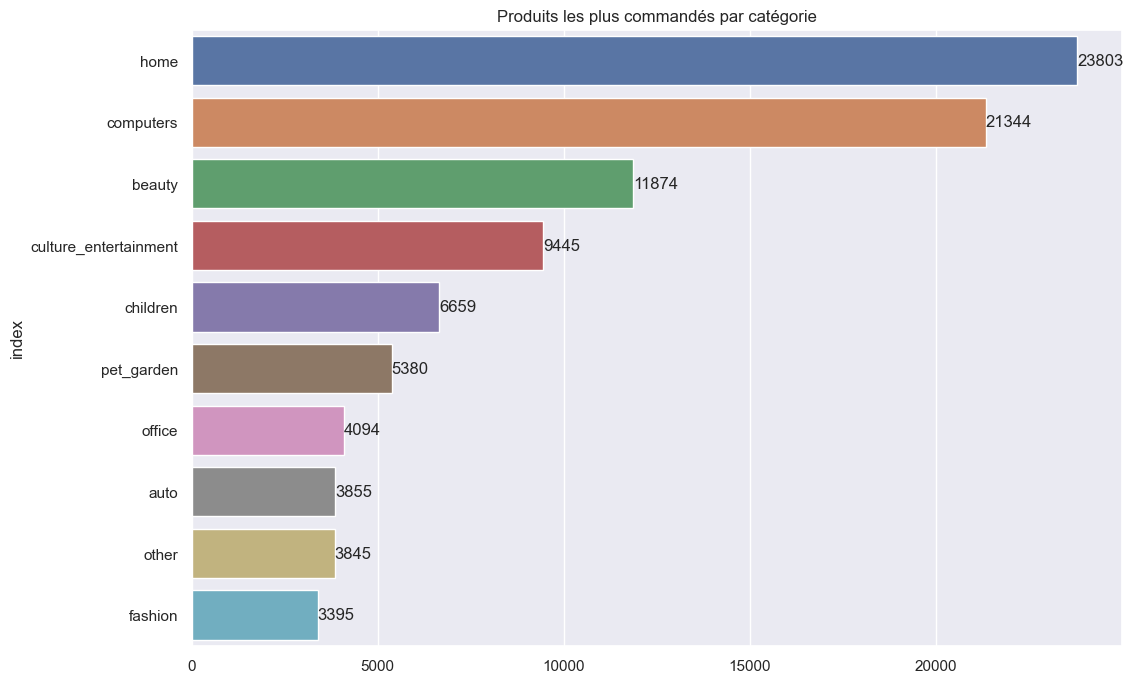

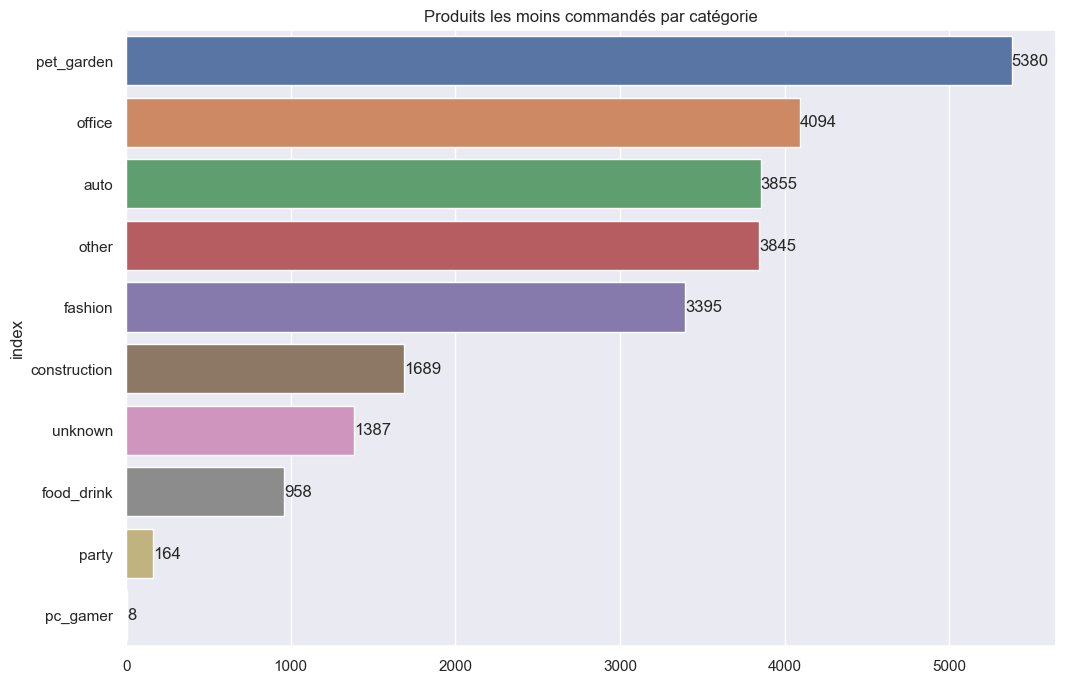

In [168]:
categorie_df2 = df2['main_category'].value_counts().reset_index()
categorie_top_df2 = categorie_df2.head(10)
categorie_flop_df2 = categorie_df2.tail(10)

plt.figure(figsize=(12, 8))
ax10_1 = sns.barplot(data=categorie_top_df2,
                     x=categorie_top_df2['main_category'], y=categorie_top_df2['index'])
ax10_1.bar_label(ax10_1.containers[0])
plt.title('Produits les plus commandés par catégorie')
plt.xlabel(None)
plt.show()

plt.figure(figsize=(12, 8))
ax11_1 = sns.barplot(data=categorie_flop_df2,
                     x=categorie_flop_df2['main_category'], y=categorie_flop_df2['index'])
ax11_1.bar_label(ax11_1.containers[0])
plt.title('Produits les moins commandés par catégorie')
plt.xlabel(None)
plt.show()

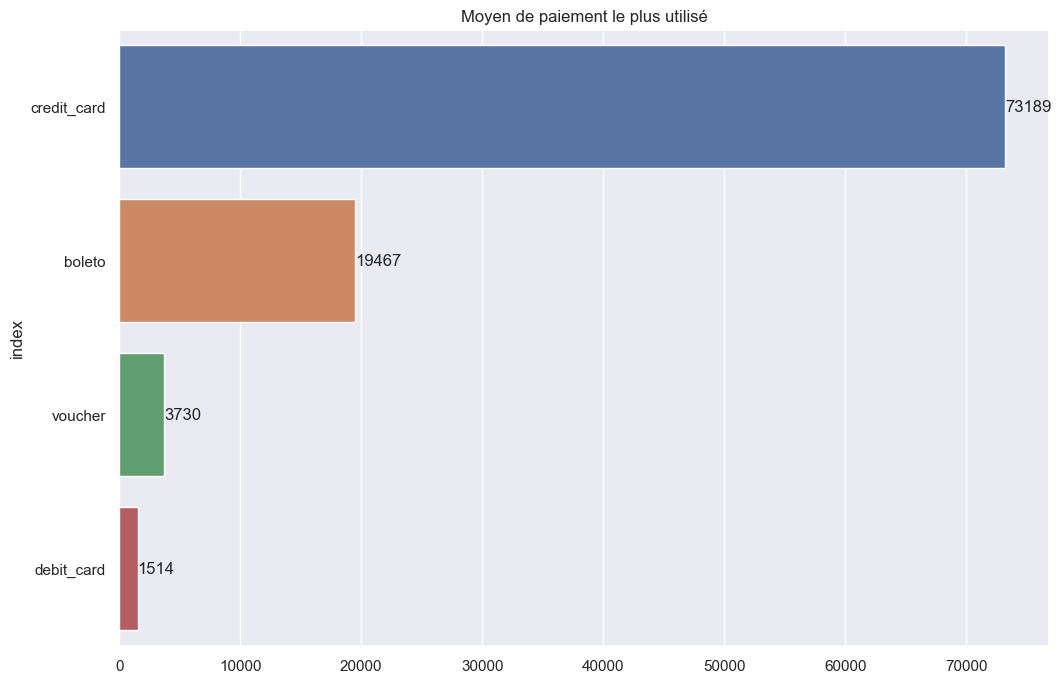

In [169]:
top_paiement = df2['top_payment'].value_counts().reset_index()

plt.figure(figsize=(12, 8))
ax10_11 = sns.barplot(
    data=top_paiement, x=top_paiement['top_payment'], y=top_paiement['index'])
ax10_11.bar_label(ax10_11.containers[0])
plt.title('Moyen de paiement le plus utilisé')
plt.xlabel(None)
plt.show()

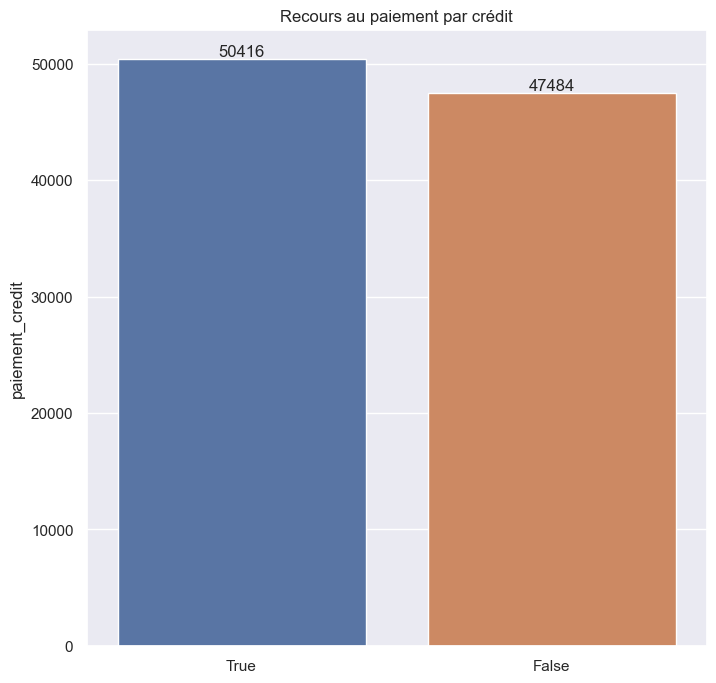

In [170]:
credit = df2['paiement_credit'].astype('str').value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_12 = sns.barplot(
    data=credit, x=credit['index'], y=credit['paiement_credit'])
ax10_12.bar_label(ax10_12.containers[0])
plt.title('Recours au paiement par crédit')
plt.xlabel(None)
plt.show()

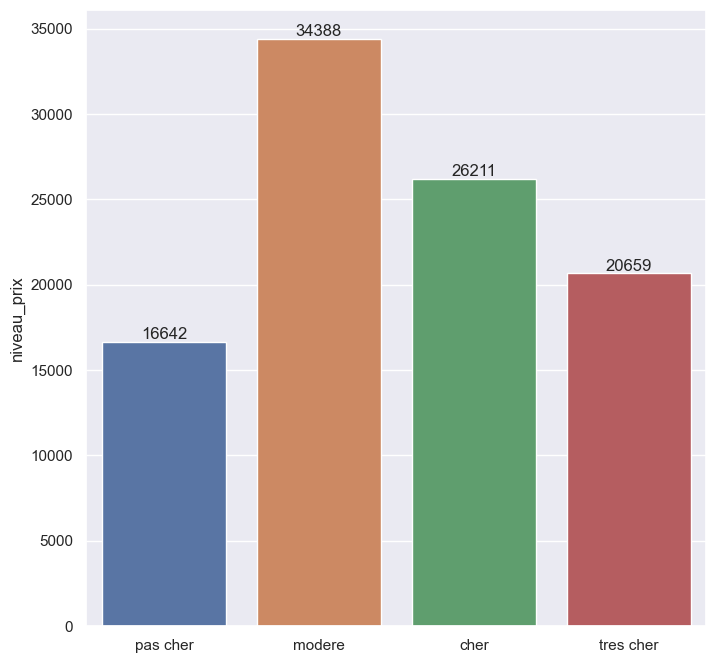

In [171]:
qualite = df2['niveau_prix'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_13 = sns.barplot(
    data=qualite, x=qualite['index'], y=qualite['niveau_prix'])
ax10_13.bar_label(ax10_13.containers[0])

plt.xlabel(None)
plt.show()

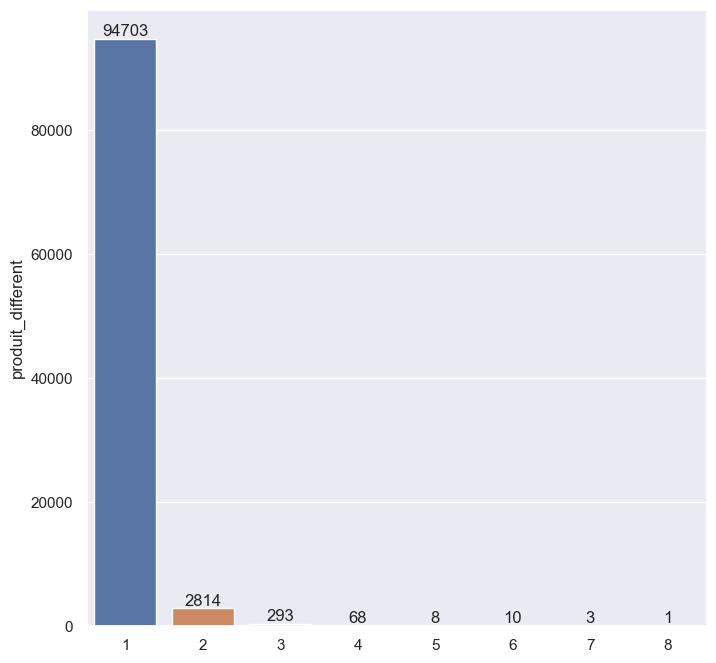

In [172]:
prod_diff = df2['produit_different'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_14 = sns.barplot(
    data=prod_diff, x=prod_diff['index'], y=prod_diff['produit_different'])
ax10_14.bar_label(ax10_14.containers[0])

plt.xlabel(None)
plt.show()

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 117327
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    97900 non-null  object         
 1   customer_unique_id             97900 non-null  object         
 2   customer_zip_code_prefix       97900 non-null  int32          
 3   customer_city                  97900 non-null  object         
 4   customer_state                 97900 non-null  object         
 5   order_id                       97900 non-null  object         
 6   order_status                   97900 non-null  object         
 7   order_purchase_timestamp       97900 non-null  datetime64[ns] 
 8   order_approved_at              97886 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   96909 non-null  datetime64[ns] 
 10  order_delivered_customer_date  95813 non-null  datetime64[ns] 
 11  o

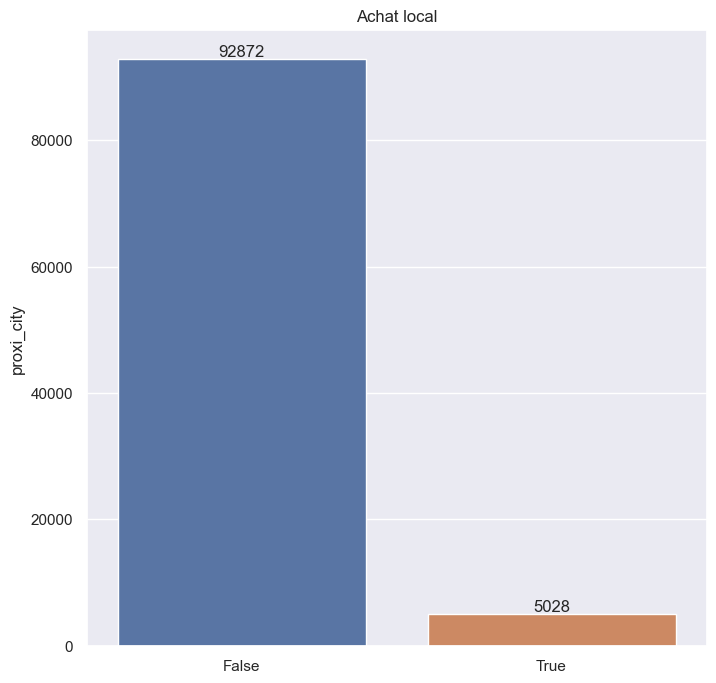

In [174]:
proximite = df2['proxi_city'].astype('str').value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_12 = sns.barplot(
    data=proximite, x=proximite['index'], y=proximite['proxi_city'])
ax10_12.bar_label(ax10_12.containers[0])
plt.title('Achat local')
plt.xlabel(None)
plt.show()

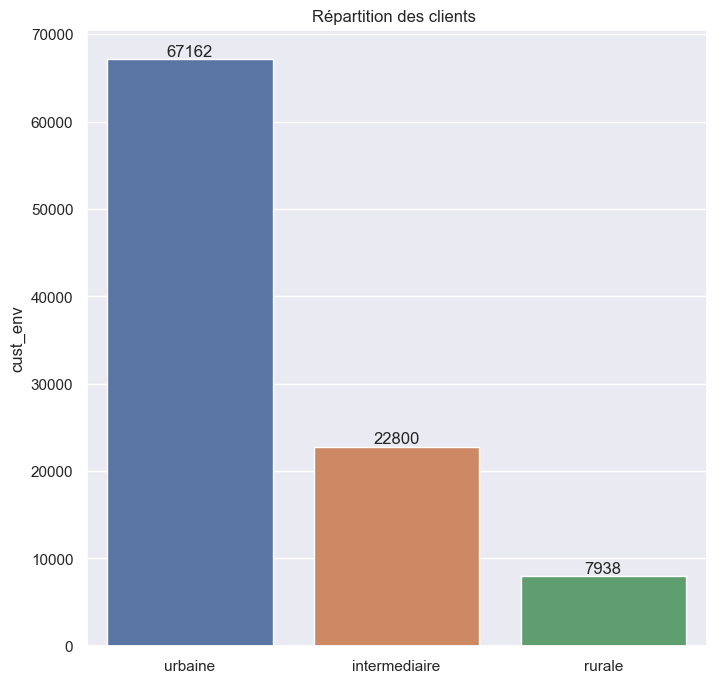

In [175]:
cust_env = df2['cust_env'].astype('str').value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_13 = sns.barplot(
    data=cust_env, x=cust_env['index'], y=cust_env['cust_env'])
ax10_13.bar_label(ax10_13.containers[0])
plt.title('Répartition des clients ')
plt.xlabel(None)
plt.show()

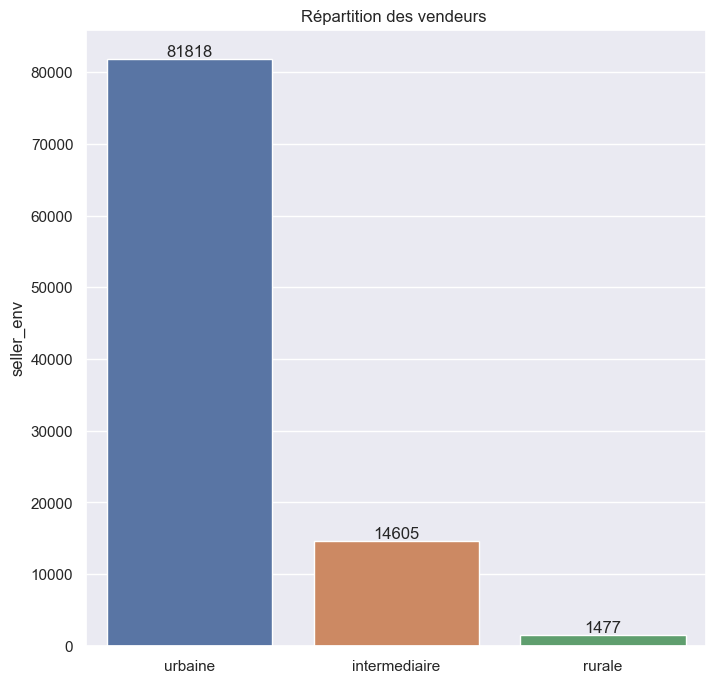

In [176]:
seller_env = df2['seller_env'].astype('str').value_counts().reset_index()

plt.figure(figsize=(8, 8))
ax10_14 = sns.barplot(
    data=seller_env, x=seller_env['index'], y=seller_env['seller_env'])
ax10_14.bar_label(ax10_14.containers[0])
plt.title('Répartition des vendeurs ')
plt.xlabel(None)
plt.show()

In [177]:
df2.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'jour_achat', 'mois_achat', 'saison',
       'délai_livraison', 'retard_livraison', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'delai_reponse',
       'delai_jour', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'total',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_pr

In [178]:
# Nouvelle dataframe qui contient mes indicateurs
df_clean = df2[['customer_unique_id', 'order_status', 'jour_achat', 'mois_achat', 'saison',
                'retard_livraison', 'seller_id', 'proxi_city', 'produit_different',
                'cust_env', 'seller_env', 'top_categ',
                'review_mean', 'top_payment', 'niveau_prix', 'paiement_credit', 'Recency',
                'frequency', 'monetary']]

In [180]:
df_clean

,customer_unique_id,order_status,jour_achat,mois_achat,saison,retard_livraison,seller_id,proxi_city,produit_different,cust_env,seller_env,top_categ,review_mean,top_payment,niveau_prix,paiement_credit,Recency,frequency,monetary
0,861eff4711a542e4b93843c6dd7febb0,delivered,Tuesday,5,Printemps,False,7c67e1448b00f6e969d365cea6b010ab,False,1,urbaine,urbaine,office,4.0,credit_card,cher,True,474,1,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,delivered,Thursday,11,Automne,False,7c67e1448b00f6e969d365cea6b010ab,False,1,rurale,urbaine,office,1.0,credit_card,cher,False,298,2,275.78
3,3c799d181c34d51f6d44bbbc563024db,delivered,Sunday,5,Printemps,False,7c67e1448b00f6e969d365cea6b010ab,False,1,intermediaire,urbaine,office,3.0,credit_card,cher,True,483,1,140.61
4,23397e992b09769faf5e66f9e171a241,delivered,Saturday,2,Hiver,False,7c67e1448b00f6e969d365cea6b010ab,False,1,urbaine,urbaine,office,4.0,credit_card,cher,True,211,1,137.58
5,567ab47ca4deb92d46dbf54dce07d0a7,delivered,Thursday,3,Hiver,False,7c67e1448b00f6e969d365cea6b010ab,False,1,intermediaire,urbaine,office,4.0,credit_card,cher,True,528,1,142.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,9ba58a98da1d0abf0bd1e422e06c9051,canceled,Monday,7,Eté,False,4ce6e5f6c52515177e18c1c9361d8677,False,1,urbaine,urbaine,auto,3.0,credit_card,tres cher,True,48,1,252.27
117324,5c22dbb9d8b5385953f2f1e6d9d115a7,delivered,Wednesday,8,Eté,False,9140ef75cc8211c4035935e80e567204,False,1,urbaine,intermediaire,pet_garden,5.0,credit_card,modere,True,32,1,72.18
117325,6532316a8c1a7c7a569482db073530bb,shipped,Monday,8,Eté,False,da4d149c0ddbac90557103ac0a0ec356,False,1,urbaine,urbaine,construction,3.0,credit_card,tres cher,True,13,1,775.98
117326,7f5f43a9394964ac51bc5d1e0204ead4,delivered,Saturday,8,Eté,False,377bc18334c78dd2f1535ef22a3ad225,False,1,rurale,intermediaire,pet_garden,5.0,credit_card,cher,True,15,1,224.44


In [181]:
df_clean['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
2e25e41277f6c276113dc8f570abb040     1
b00fb3881028d294a4b2651af05a8049     1
91049771b745aa43500e4c82ed6a2241     1
07d358f5aaf702e100efd1a4b6279564     1
82d46759af0369aad49084bacf85a6c3     1
Name: customer_unique_id, Length: 94707, dtype: int64

In [182]:
df_clean.loc[df_clean['customer_unique_id']
             == '8d50f5eadf50201ccdcedfb9e2ac8455', :]

,customer_unique_id,order_status,jour_achat,mois_achat,saison,retard_livraison,seller_id,proxi_city,produit_different,cust_env,seller_env,top_categ,review_mean,top_payment,niveau_prix,paiement_credit,Recency,frequency,monetary
24610,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Wednesday,11,Automne,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,culture_entertainment,5.0,credit_card,pas cher,False,284,1,21.77
24630,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Tuesday,8,Eté,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,culture_entertainment,5.0,credit_card,pas cher,False,26,1,34.44
24713,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Tuesday,7,Eté,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,fashion,5.0,credit_card,pas cher,False,411,1,21.77
24714,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Sunday,10,Automne,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,fashion,5.0,credit_card,pas cher,False,308,1,21.77
24796,8d50f5eadf50201ccdcedfb9e2ac8455,shipped,Monday,5,Printemps,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,culture_entertainment,5.0,credit_card,pas cher,False,475,1,22.77
24813,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Wednesday,7,Eté,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,fashion,5.0,credit_card,pas cher,False,60,1,30.41
24816,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Wednesday,10,Automne,False,1da3aeb70d7989d1e6d9b0e887f97c23,True,1,urbaine,urbaine,culture_entertainment,5.0,credit_card,pas cher,False,319,1,37.77
65351,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Monday,7,Eté,False,a3a38f4affed601eb87a97788c949667,False,1,urbaine,intermediaire,culture_entertainment,5.0,credit_card,cher,True,405,1,166.71
75077,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Saturday,8,Eté,False,0691148aee60ca47977c187804f935ae,False,1,urbaine,intermediaire,culture_entertainment,5.0,credit_card,modere,True,15,1,96.40
85632,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,Monday,5,Printemps,False,db4350fd57ae30082dec7acbaacc17f9,True,1,urbaine,urbaine,culture_entertainment,5.0,credit_card,modere,False,104,1,53.38


In [183]:
df2.to_csv('p5_clean')

In [184]:
df_clean.to_csv('df_clean.csv')

In [185]:
df_order_tri = df_clean.loc[(df_clean['order_status'] == 'delivered') | (
    df_clean['order_status'] == 'canceled') | (df_clean['order_status'] == 'unavailable'), :]

In [186]:
df_order_tri.to_csv('p5_order.csv')